In volatility trading, just like TLAQ we should build our business on strong foundation. Risk premia is one of those durable trades and volatility risk premium is covered in TLAQ. This notebook is based on [TLAQ Research Session 1  - Equity Index VRP Analysis](https://colab.research.google.com/drive/1X3rkf2bxaWqq31giX9u-Eh_zD5uAplKG?usp=sharing#scrollTo=E1gwU8sRVckm) and [2022 Review and Alternative Implementations](https://colab.research.google.com/drive/1X8crftLPQVpASmSxJFnCCm2Te_K6d2qS?usp=sharing#scrollTo=1BccGR-yP-DQ) 

In [ ]:
install.packages('tidyverse')
install.packages('lubridate')
install.packages('slider')
install.packages('tibbletime')
library(tidyverse)
library(lubridate)
library(slider)
library(tibbletime)


# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# VRP Analysis

Follow along with [TLAQ Research Session 1](https://colab.research.google.com/drive/1X3rkf2bxaWqq31giX9u-Eh_zD5uAplKG?usp=sharing#scrollTo=RiW2ll12S3aZ)

## ETH Dvol

In [ ]:
eth_vol <- read.csv(file = '/content/eth_dvol.csv')

eth_vol <- eth_vol %>% 
            mutate(datetime = ymd_hms(datetime),
                    date = floor_date(datetime, 'day'))

eth_vol %>% head()

,timestamp,open,high,low,close,datetime,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>
1,1.616544e+12,94.18,94.30,93.68,93.86,2021-03-24 00:00:00,2021-03-24
2,1.616548e+12,93.86,94.65,93.77,94.35,2021-03-24 01:00:00,2021-03-24
3,1.616551e+12,94.35,97.26,94.25,94.65,2021-03-24 02:00:00,2021-03-24
4,1.616555e+12,94.65,95.07,94.54,95.07,2021-03-24 03:00:00,2021-03-24
5,1.616558e+12,95.07,95.07,94.16,94.18,2021-03-24 04:00:00,2021-03-24
6,1.616562e+12,94.18,94.38,93.39,93.41,2021-03-24 05:00:00,2021-03-24


Create daily dvol from close to close

In [ ]:
eth_dvol <- eth_vol %>%
              group_by(date) %>%
                summarise(
                      dvol = first(close)
                      )

eth_dvol %>% head()

date,dvol
<dttm>,<dbl>
2021-03-24,93.86
2021-03-25,107.62
2021-03-26,103.47
2021-03-27,89.95
2021-03-28,87.81
2021-03-29,83.96


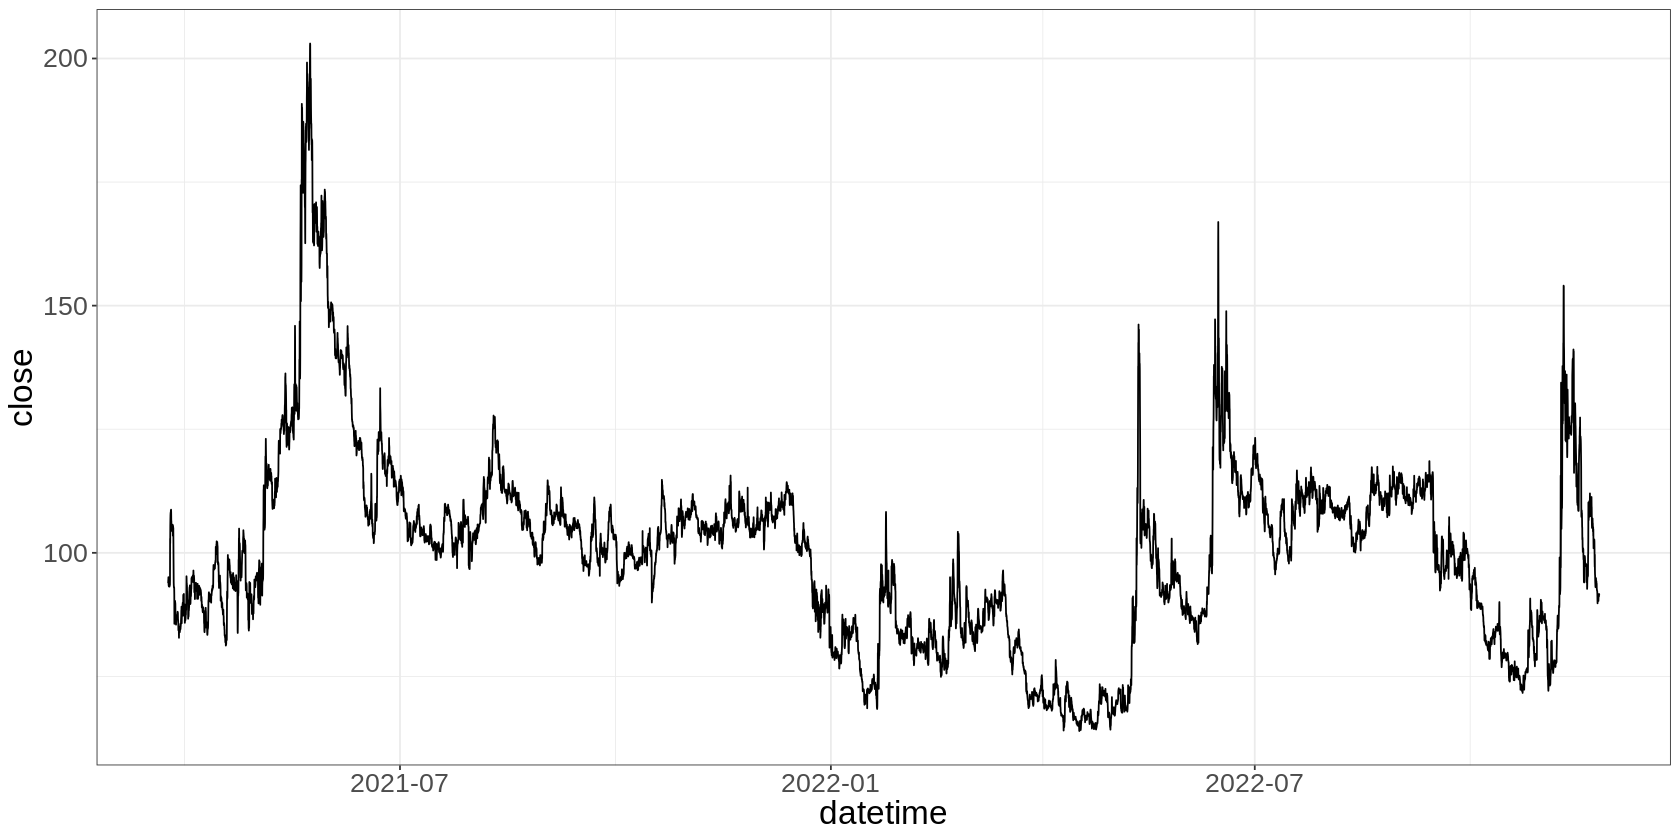

In [ ]:
eth_vol %>% 
  ggplot(aes(x=datetime, y=close)) + geom_line()

Looking at plots of VIX side-by-side. The similarity ends at the near stationary data. ETH DVol distribution has both big left tail and peaky right tail while VIX just has the peaky right.

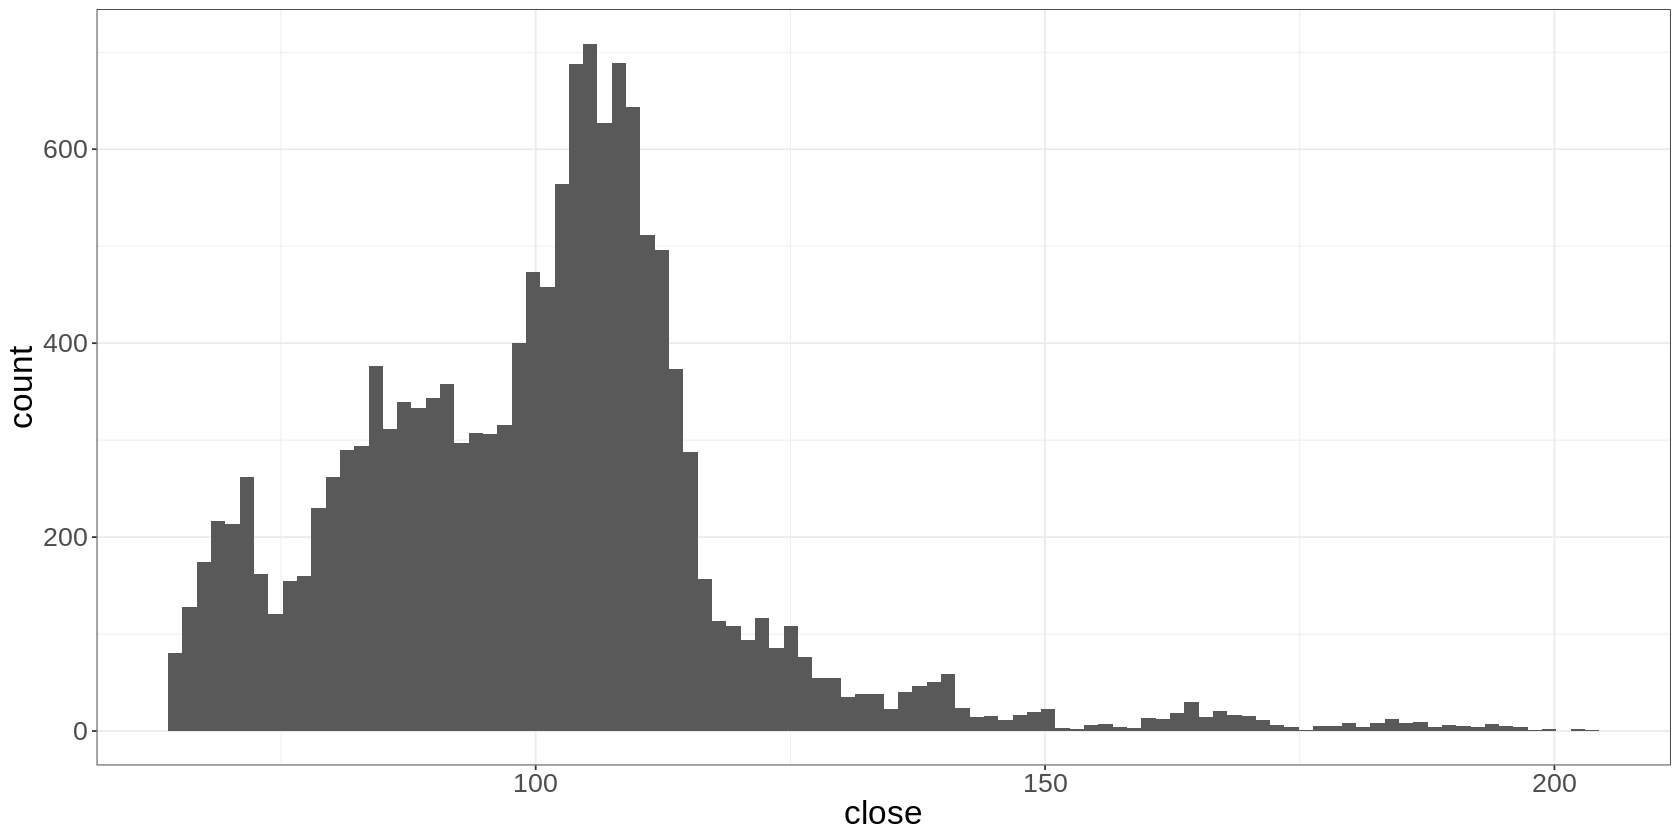

In [ ]:
eth_vol %>%
  ggplot(aes(x=close)) + geom_histogram(bins = 100)

Then comes caution as we don't even have 2 years of data. And this year doesn't have the same shape as last year. Looks like completely different beast really.

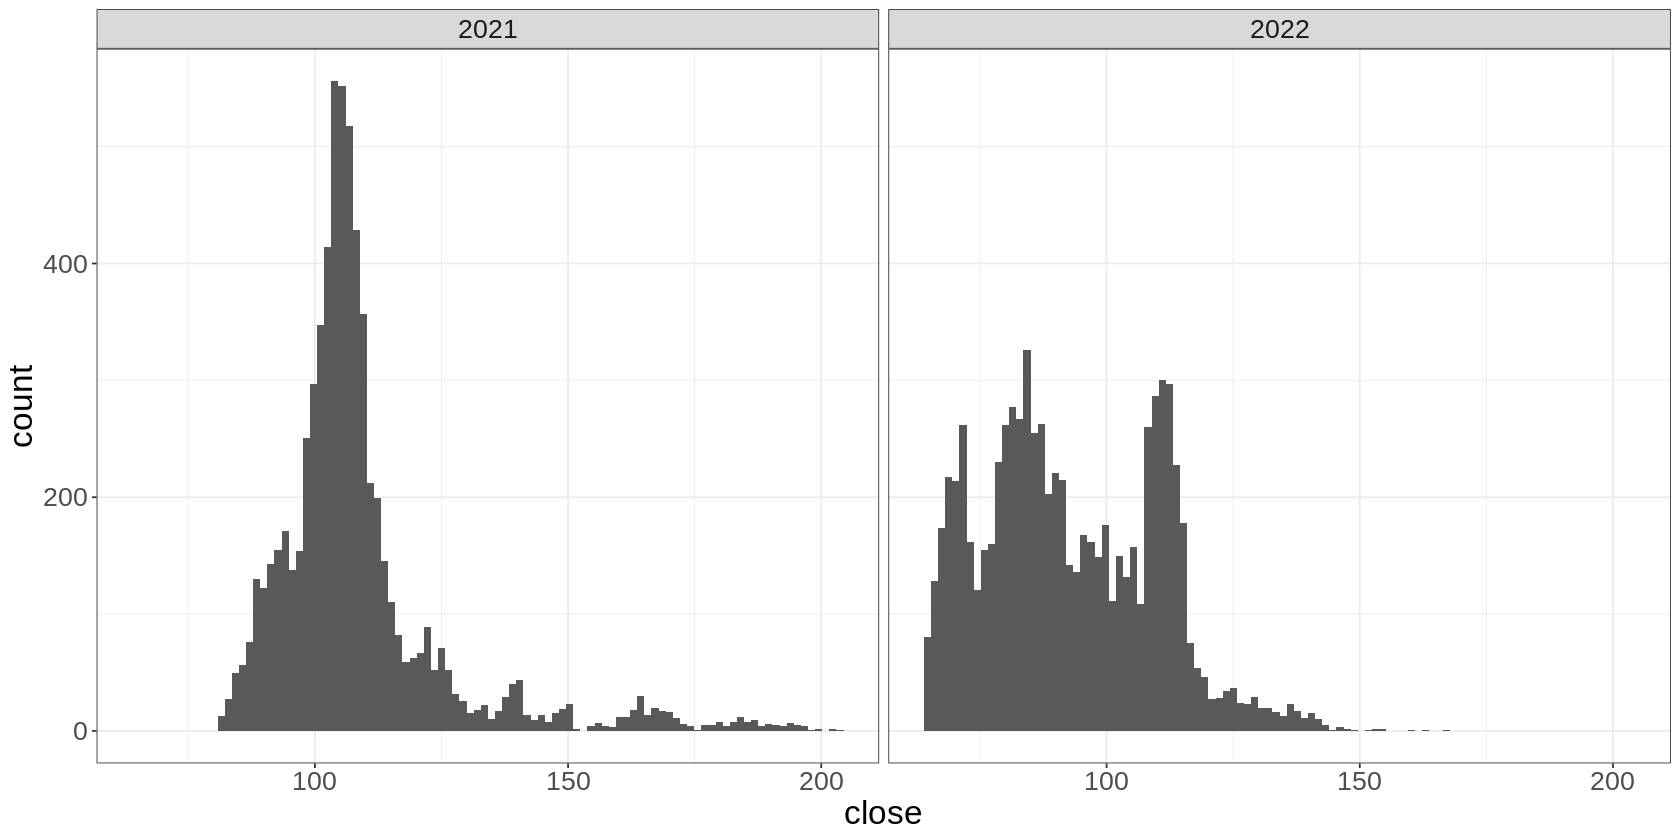

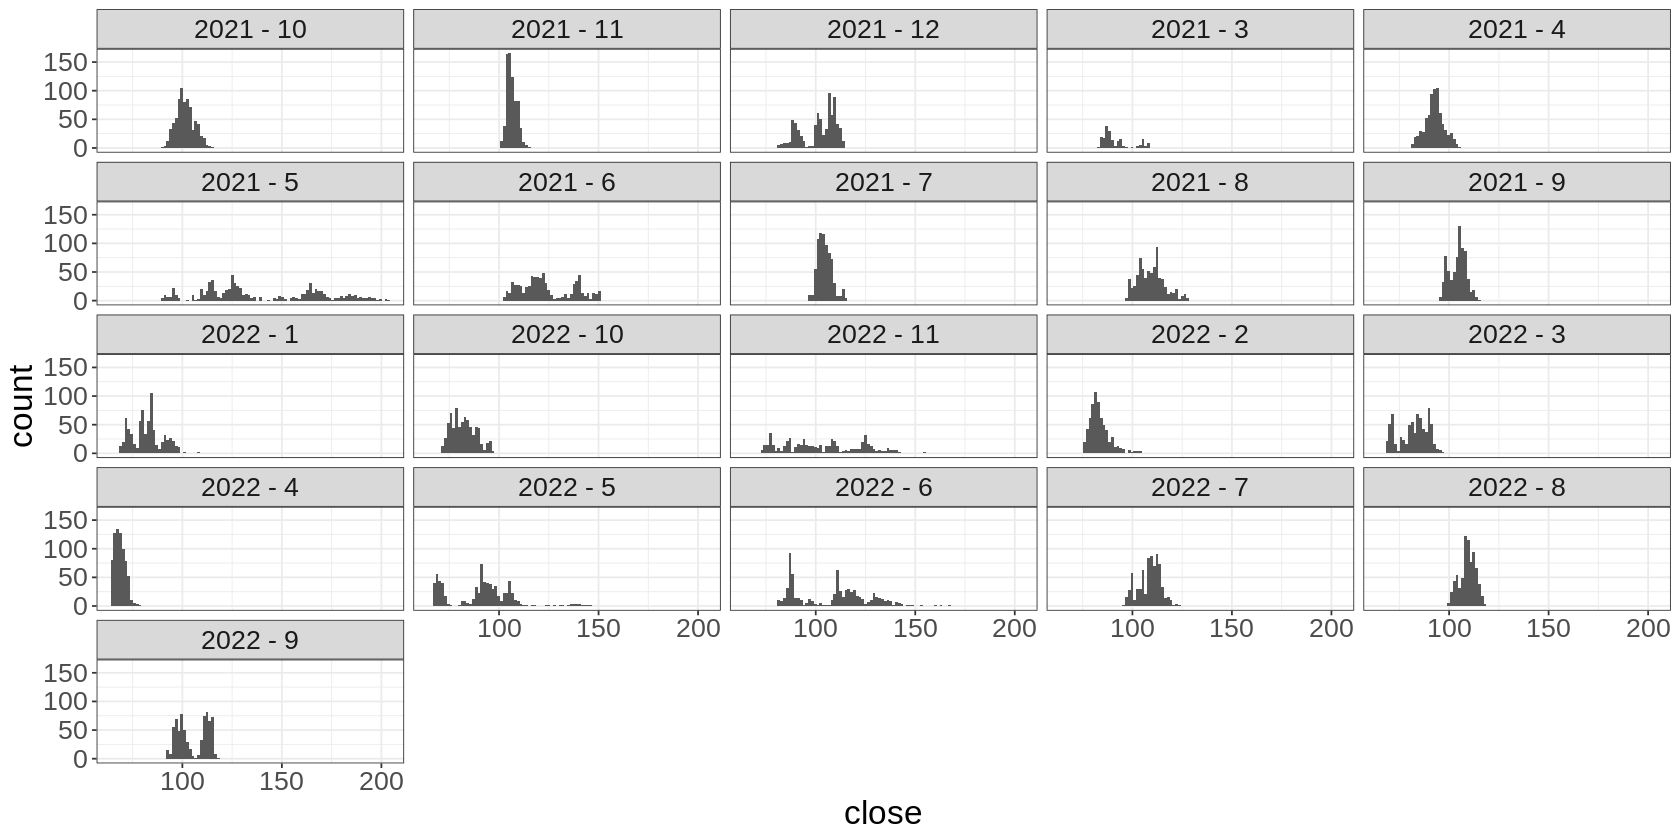

In [ ]:
eth_vol %>%
  mutate(year = year(datetime)) %>% 
  ggplot(aes(x=close)) + 
    geom_histogram(bins = 100) + 
    facet_wrap(~year)

eth_vol %>%
  mutate(
    year = lubridate::year(datetime),
    month = lubridate::month(datetime),
    yearmonth = paste(year,'-', month),
    ) %>% 
  ggplot(aes(x=close)) + 
    geom_histogram(bins = 100) + 
    facet_wrap(~yearmonth)

## ETH PERPETUAL

Dvol comes from ETH Options Implied Volatility.

In [ ]:
eth <- read.csv(file = '/content/eth.csv')

eth <- eth %>% 
  mutate(
    datetime = ymd_hms(datetime),
    date = floor_date(datetime, 'day')
    )

eth %>% head()

,volume,ticks,open,high,low,close,datetime,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>
1,4766.528,1.604164e+12,388.85,388.9,386.30,387.20,2020-10-31 17:00:00,2020-10-31
2,4578.452,1.604167e+12,387.20,387.2,384.30,385.35,2020-10-31 18:00:00,2020-10-31
3,3665.095,1.604171e+12,385.35,387.4,385.05,385.85,2020-10-31 19:00:00,2020-10-31
4,2459.088,1.604174e+12,385.85,388.2,385.35,388.15,2020-10-31 20:00:00,2020-10-31
5,1601.164,1.604178e+12,388.20,388.2,387.25,387.50,2020-10-31 21:00:00,2020-10-31
6,2789.143,1.604182e+12,387.55,388.9,387.25,388.75,2020-10-31 22:00:00,2020-10-31


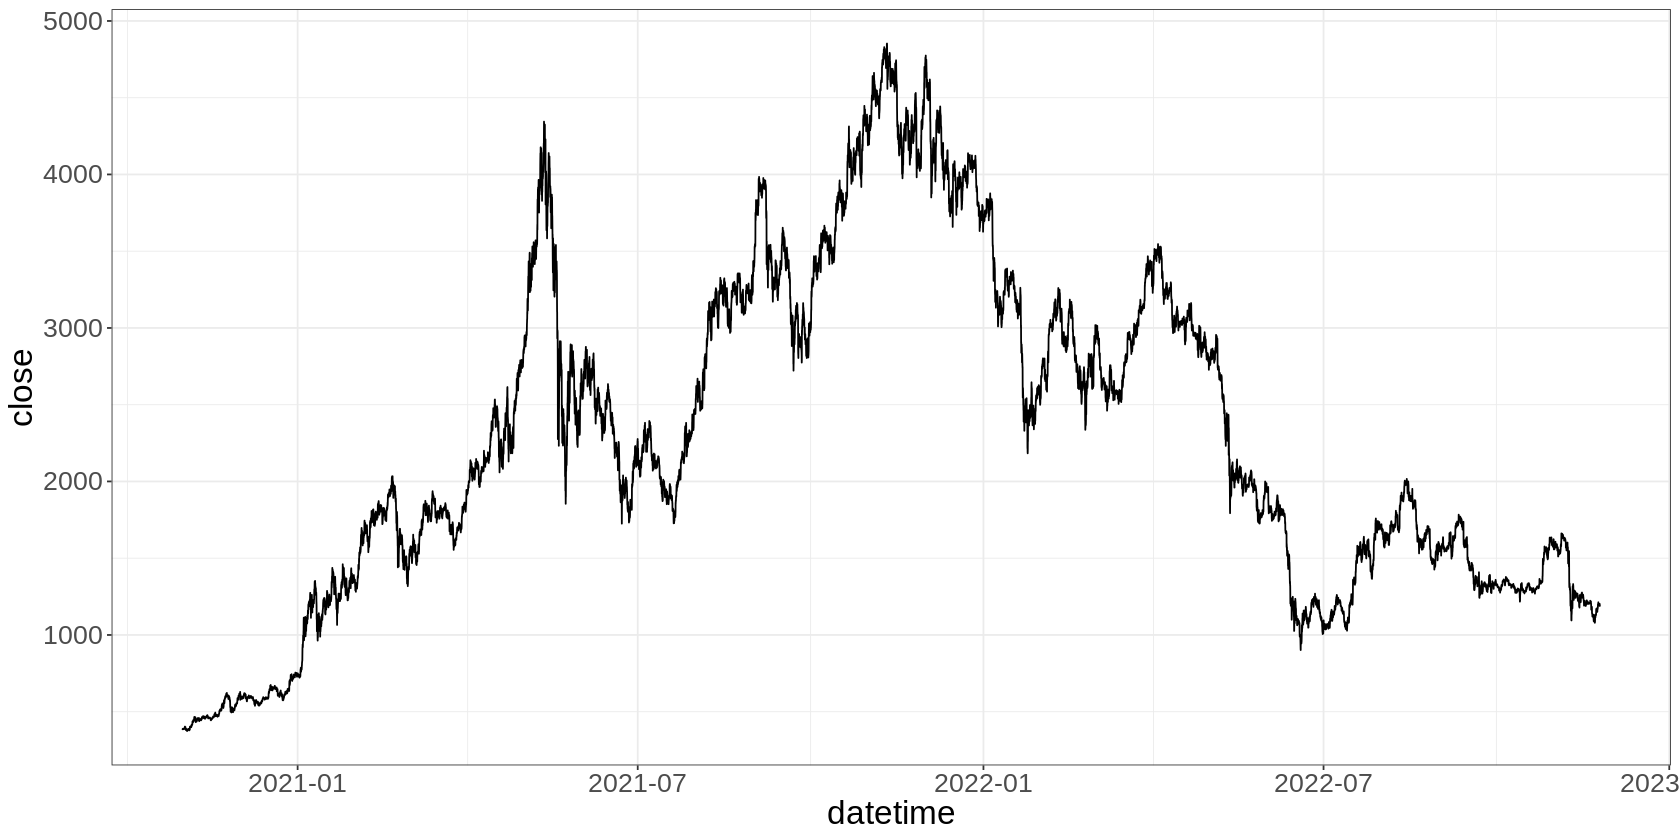

In [ ]:
eth %>%
  ggplot(aes(x=datetime, y=close)) + geom_line()

Well, unlike the up and to the right SPY, now that we're below 2018 ATH maybe crypto is a more stationary asset with fat positive skew. Sounds like commodities?

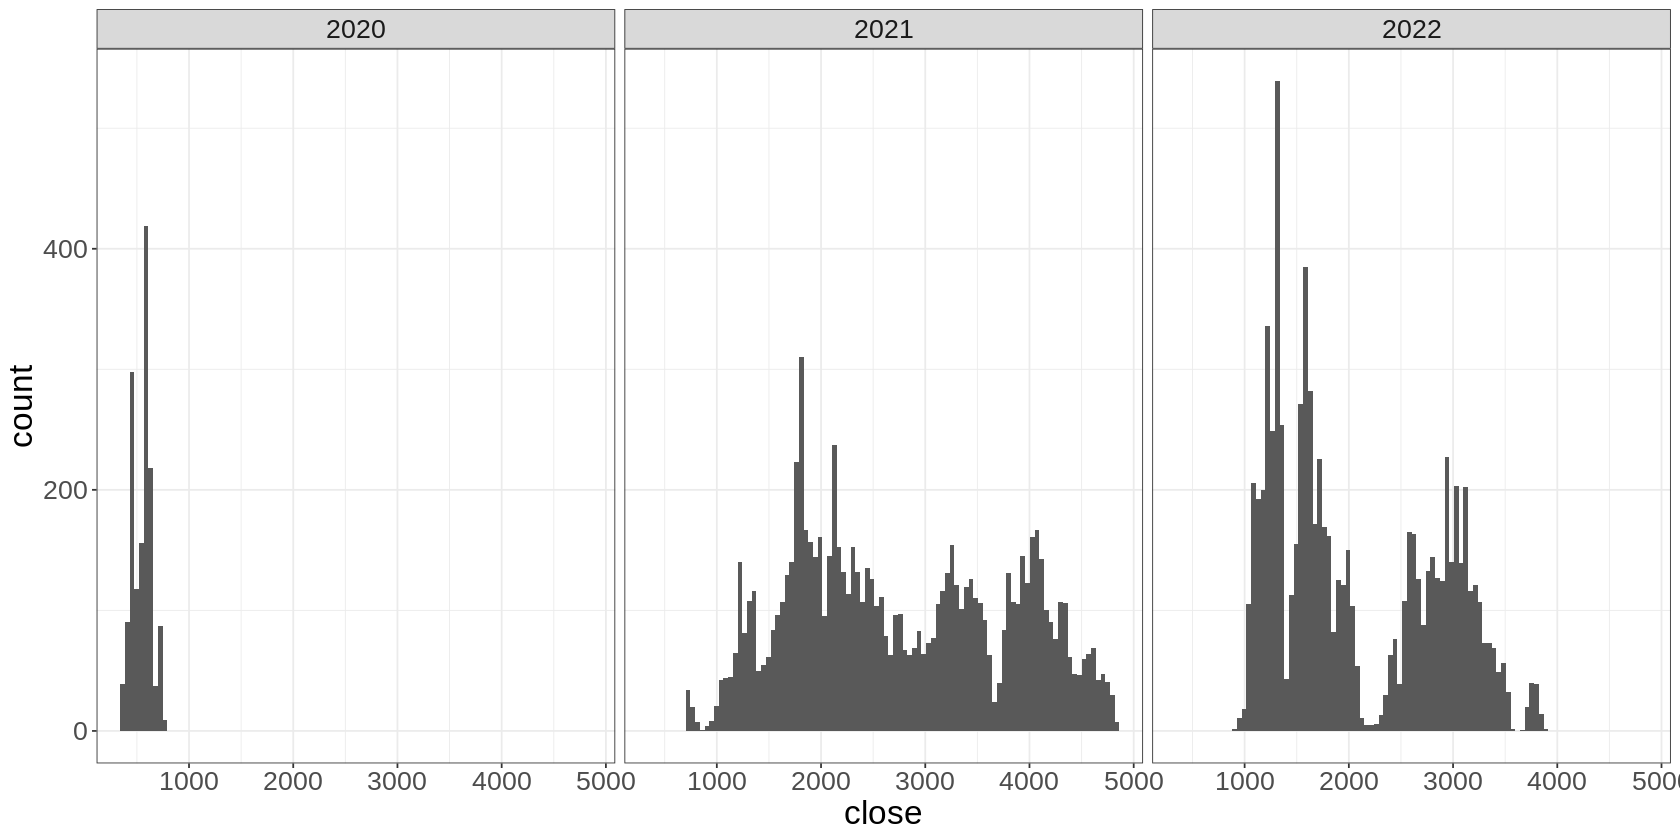

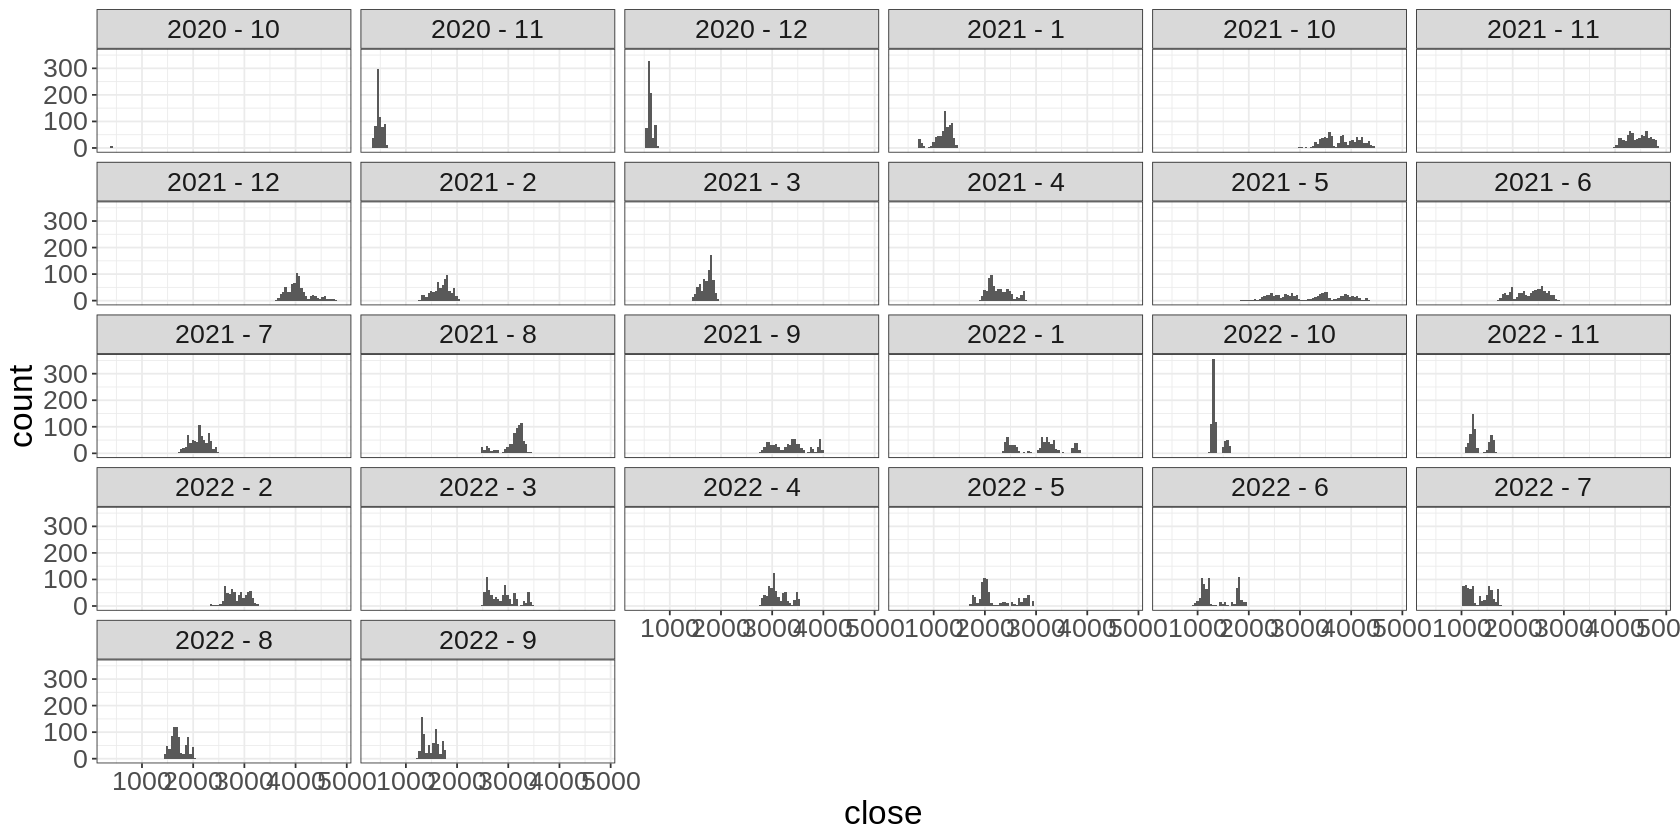

In [ ]:
eth %>%
  mutate(year = year(datetime)) %>% 
  ggplot(aes(x=close)) + 
    geom_histogram(bins = 100) + 
    facet_wrap(~year)

eth %>%
  mutate(
    year = lubridate::year(datetime),
    month = lubridate::month(datetime),
    yearmonth = paste(year,'-', month),
    ) %>% 
  ggplot(aes(x=close)) + 
    geom_histogram(bins = 100) + 
    facet_wrap(~yearmonth)

## ETH Realized Volatility

With crypto trading 24/7 we use square root of 365 times daily standard deviation as our proxy for volatility.

In [ ]:
eth <- eth %>% 
  arrange(datetime) %>%
  mutate(lag_close = lag(close)) %>%
  mutate(log_returns = log(close / lag(close))) %>%
  na.omit()

eth %>% head()

,volume,ticks,open,high,low,close,datetime,date,lag_close,log_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>
2,4578.452,1.604167e+12,387.20,387.2,384.30,385.35,2020-10-31 18:00:00,2020-10-31,387.20,-0.004789343
3,3665.095,1.604171e+12,385.35,387.4,385.05,385.85,2020-10-31 19:00:00,2020-10-31,385.35,0.001296681
4,2459.088,1.604174e+12,385.85,388.2,385.35,388.15,2020-10-31 20:00:00,2020-10-31,385.85,0.005943170
5,1601.164,1.604178e+12,388.20,388.2,387.25,387.50,2020-10-31 21:00:00,2020-10-31,388.15,-0.001676014
6,2789.143,1.604182e+12,387.55,388.9,387.25,388.75,2020-10-31 22:00:00,2020-10-31,387.50,0.003220615
7,5048.326,1.604185e+12,388.70,388.7,385.30,386.90,2020-10-31 23:00:00,2020-10-31,388.75,-0.004770202


In [ ]:
rv <- eth %>%
  filter(date >= '2020-11-01') %>% # incomplete data before here
  group_by(date) %>%
  summarise(
    # 24 * 365 as we use hourly data 
    rv = sd(log_returns) * sqrt(24 * 365) * 100
  ) %>%
  na.omit()

rv %>% head()

date,rv
<dttm>,<dbl>
2020-11-01,38.95541
2020-11-02,89.98234
2020-11-03,57.79935
2020-11-04,99.98012
2020-11-05,74.23763
2020-11-06,109.28141


In [ ]:
rv %>% tail()

date,rv
<dttm>,<dbl>
2022-11-20,82.14533
2022-11-21,62.61811
2022-11-22,90.07444
2022-11-23,75.58450
2022-11-24,50.26787
2022-11-25,28.77297


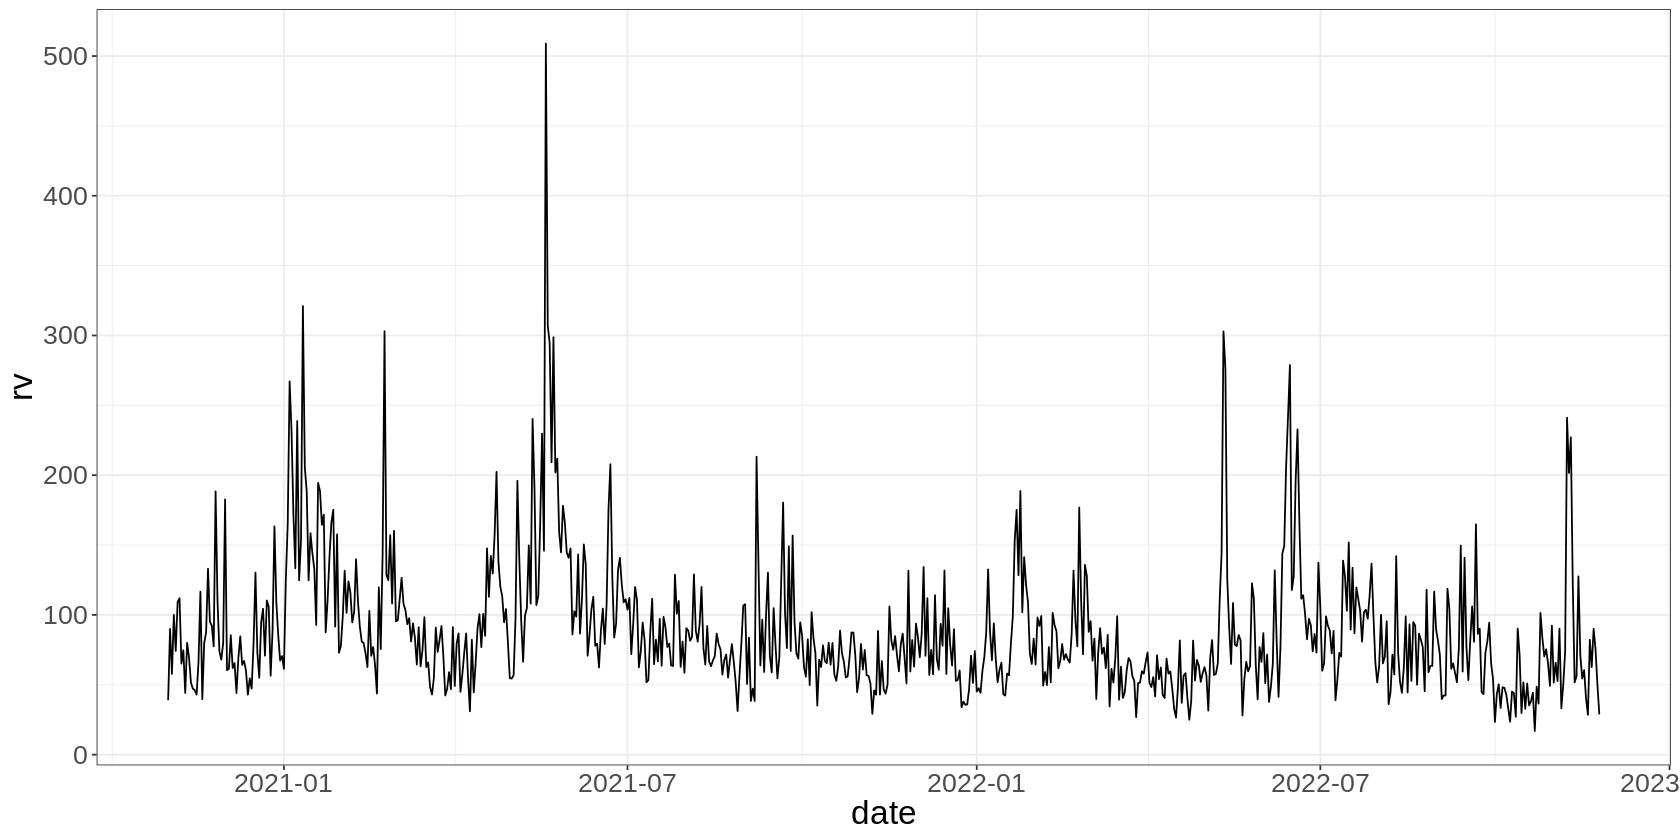

In [ ]:
rv %>%
  ggplot(aes(x=date, y=rv)) + geom_line()

## Initial analysis

In [ ]:
eth_dvol %>% head()

date,dvol
<dttm>,<dbl>
2021-03-24,93.86
2021-03-25,107.62
2021-03-26,103.47
2021-03-27,89.95
2021-03-28,87.81
2021-03-29,83.96


In [ ]:
rv %>% head()

date,rv
<dttm>,<dbl>
2020-11-01,38.95541
2020-11-02,89.98234
2020-11-03,57.79935
2020-11-04,99.98012
2020-11-05,74.23763
2020-11-06,109.28141


In [ ]:
vrp <- rv %>%
  left_join(eth_dvol, b=c('date' = 'date')) %>%
  mutate(
    vrp = dvol - rv
  ) %>%
  select(date, dvol, rv, vrp) %>%
  na.omit()

vrp %>% head()

date,dvol,rv,vrp
<dttm>,<dbl>,<dbl>,<dbl>
2021-03-24,93.86,82.05286,11.80714
2021-03-25,107.62,92.05515,15.56485
2021-03-26,103.47,70.30660,33.16340
2021-03-27,89.95,42.31684,47.63316
2021-03-28,87.81,47.05438,40.75562
2021-03-29,83.96,58.98410,24.97590


We see that the vrp is much juicier than SPX, but then the negative tail is just outright nasty and comes knocking quite often. Remember, we're looking at daily while SPX is yearmonth!

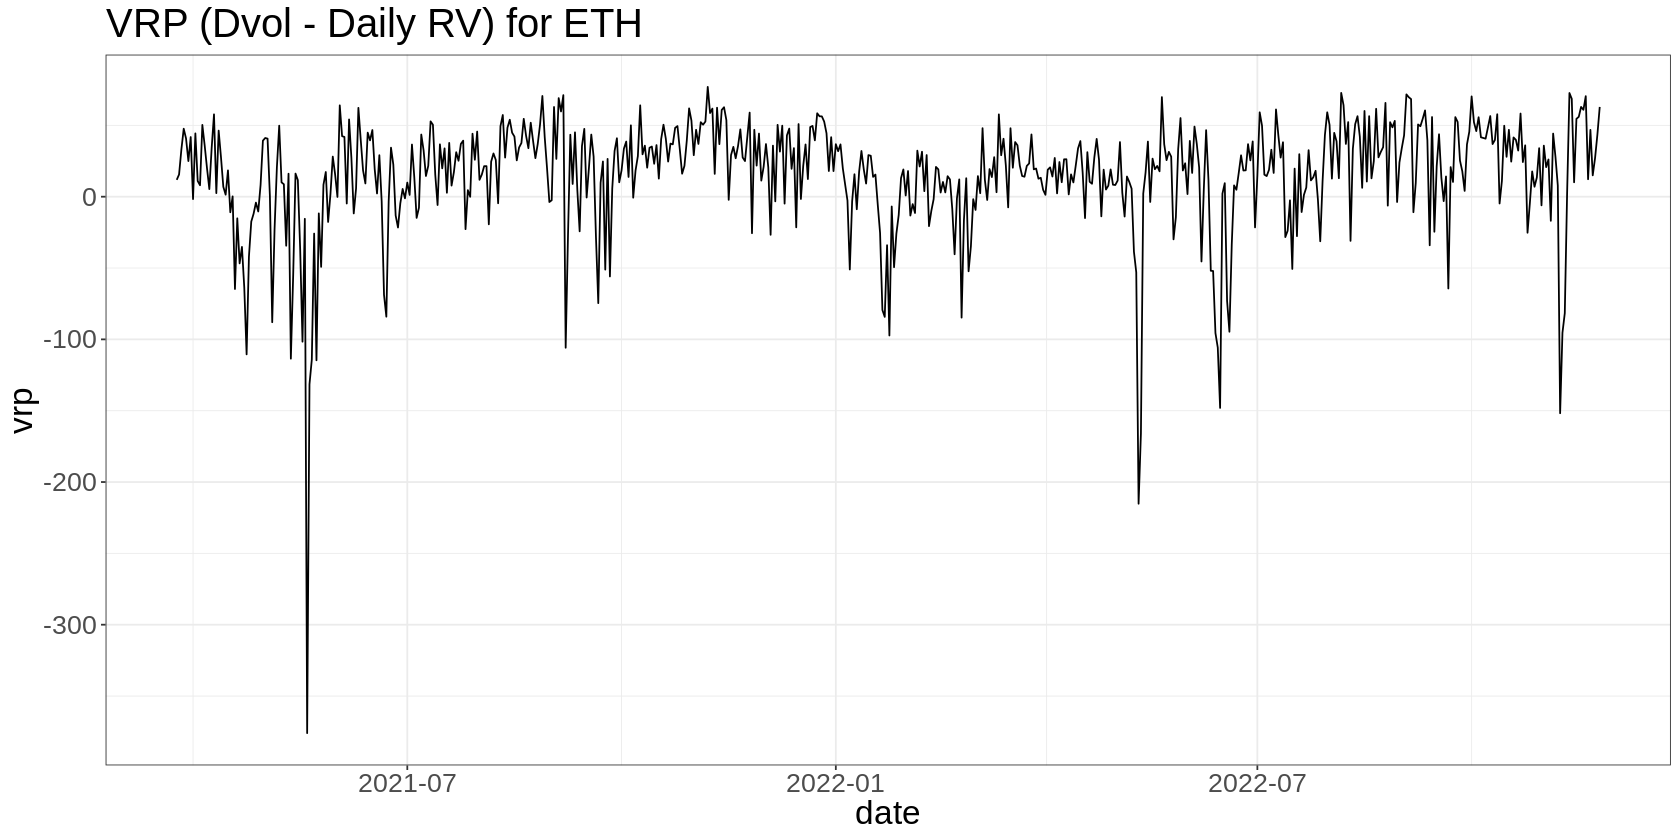

In [ ]:
vrp %>%
  ggplot(aes(x=date, y=vrp)) + geom_line() +
  ggtitle('VRP (Dvol - Daily RV) for ETH')

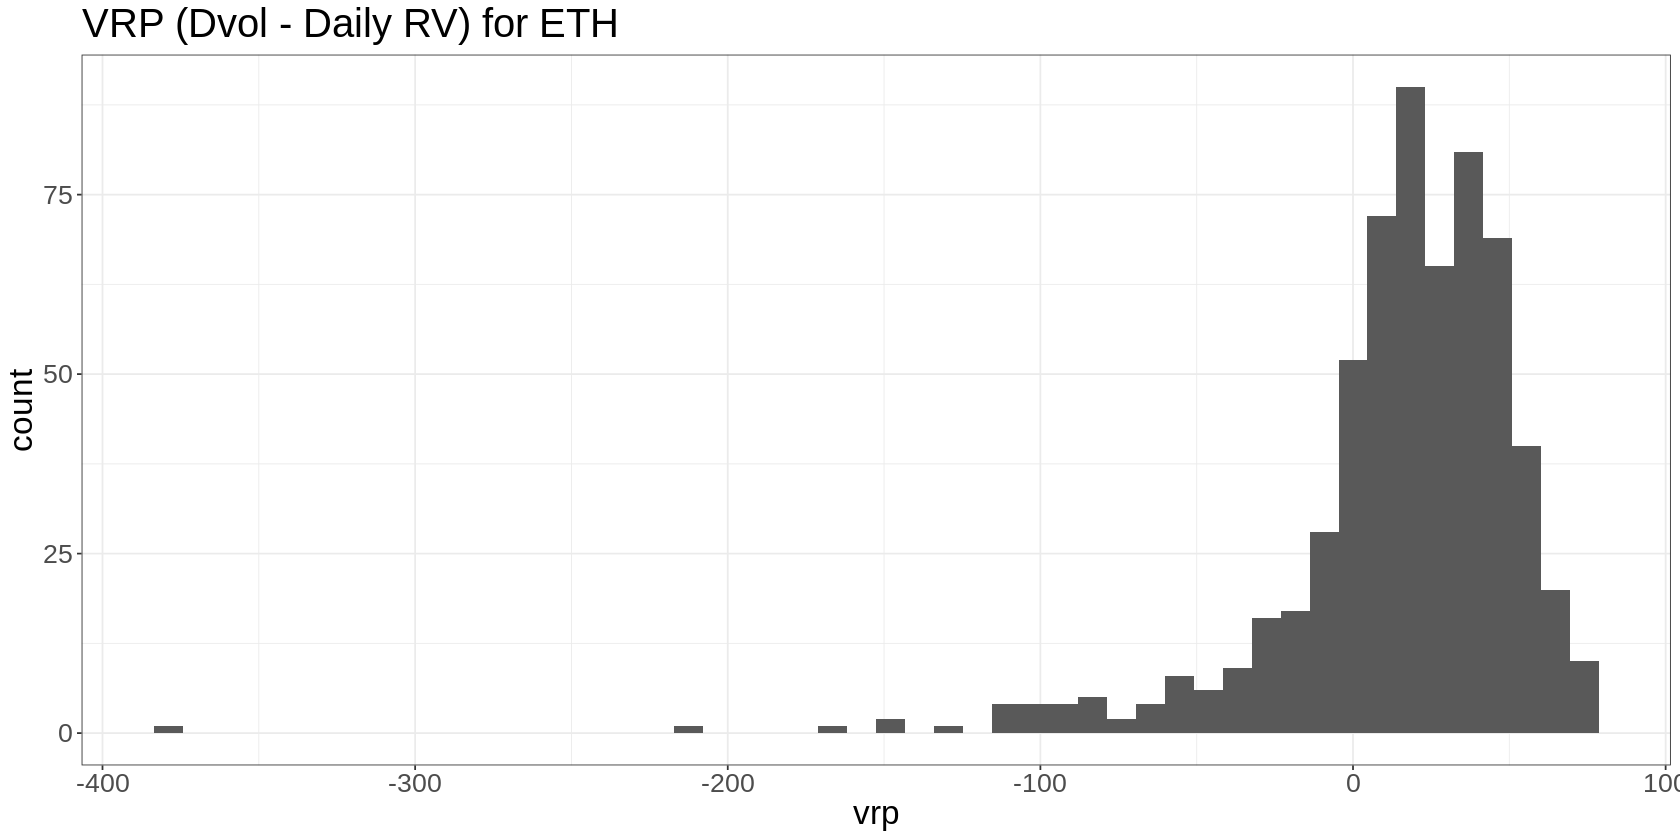

In [ ]:
vrp %>%
  ggplot(aes(x=vrp)) + 
  geom_histogram(bins=50) + 
  ggtitle('VRP (Dvol - Daily RV) for ETH')

`geom_smooth()` using formula = 'y ~ x'


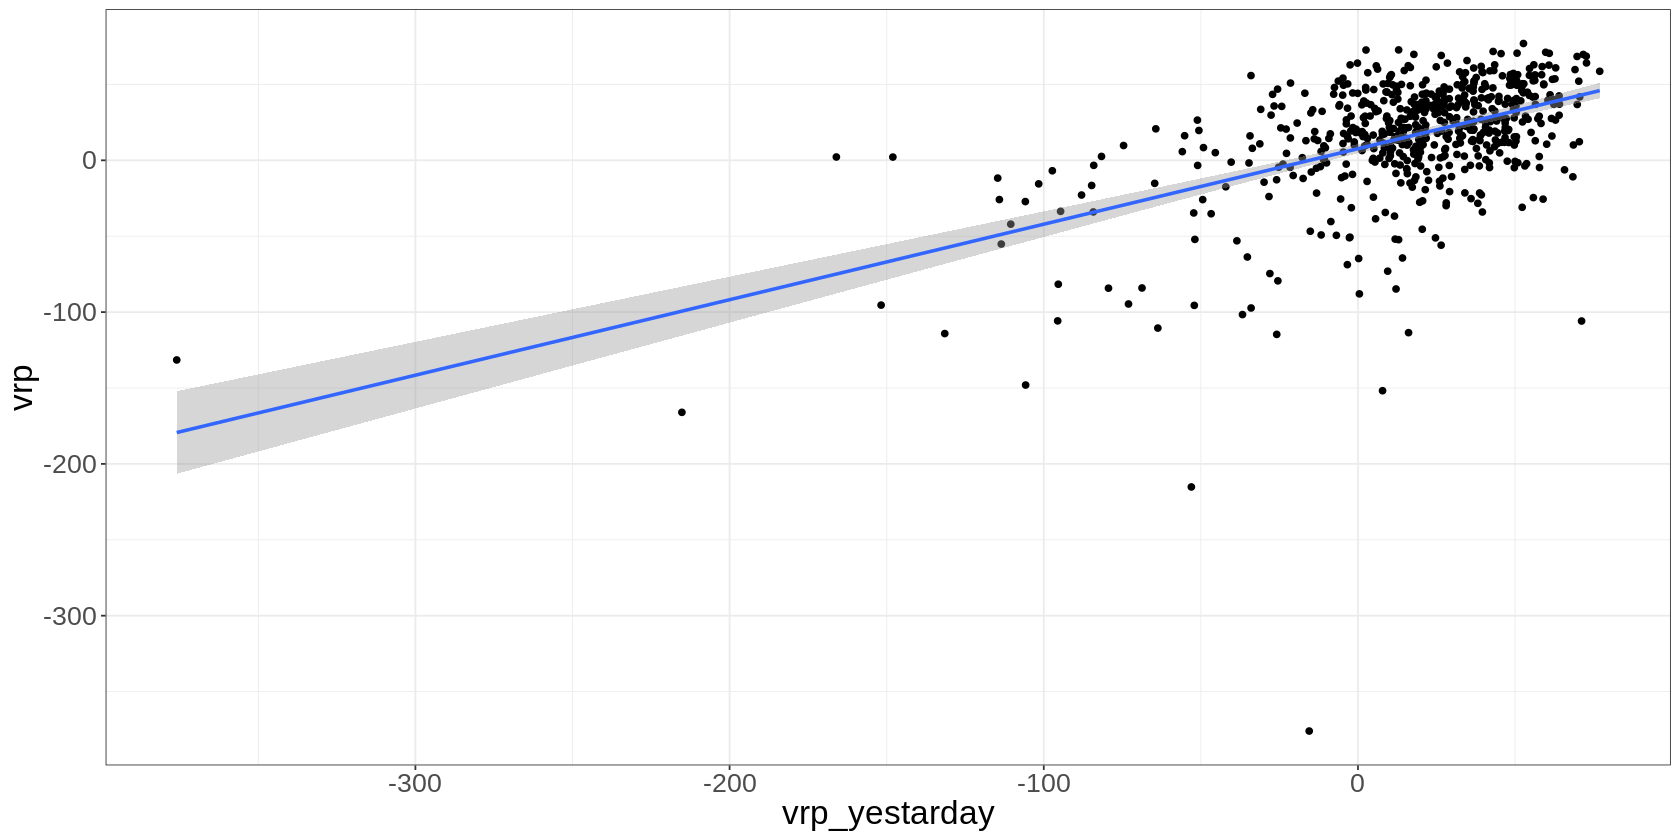

In [ ]:
vrp %>%
 mutate(vrp_yestarday = lag(vrp)) %>%
 na.omit() %>%
 ggplot(aes(x=vrp_yestarday, y=vrp)) +
  geom_point() +
  geom_smooth(method = 'lm')

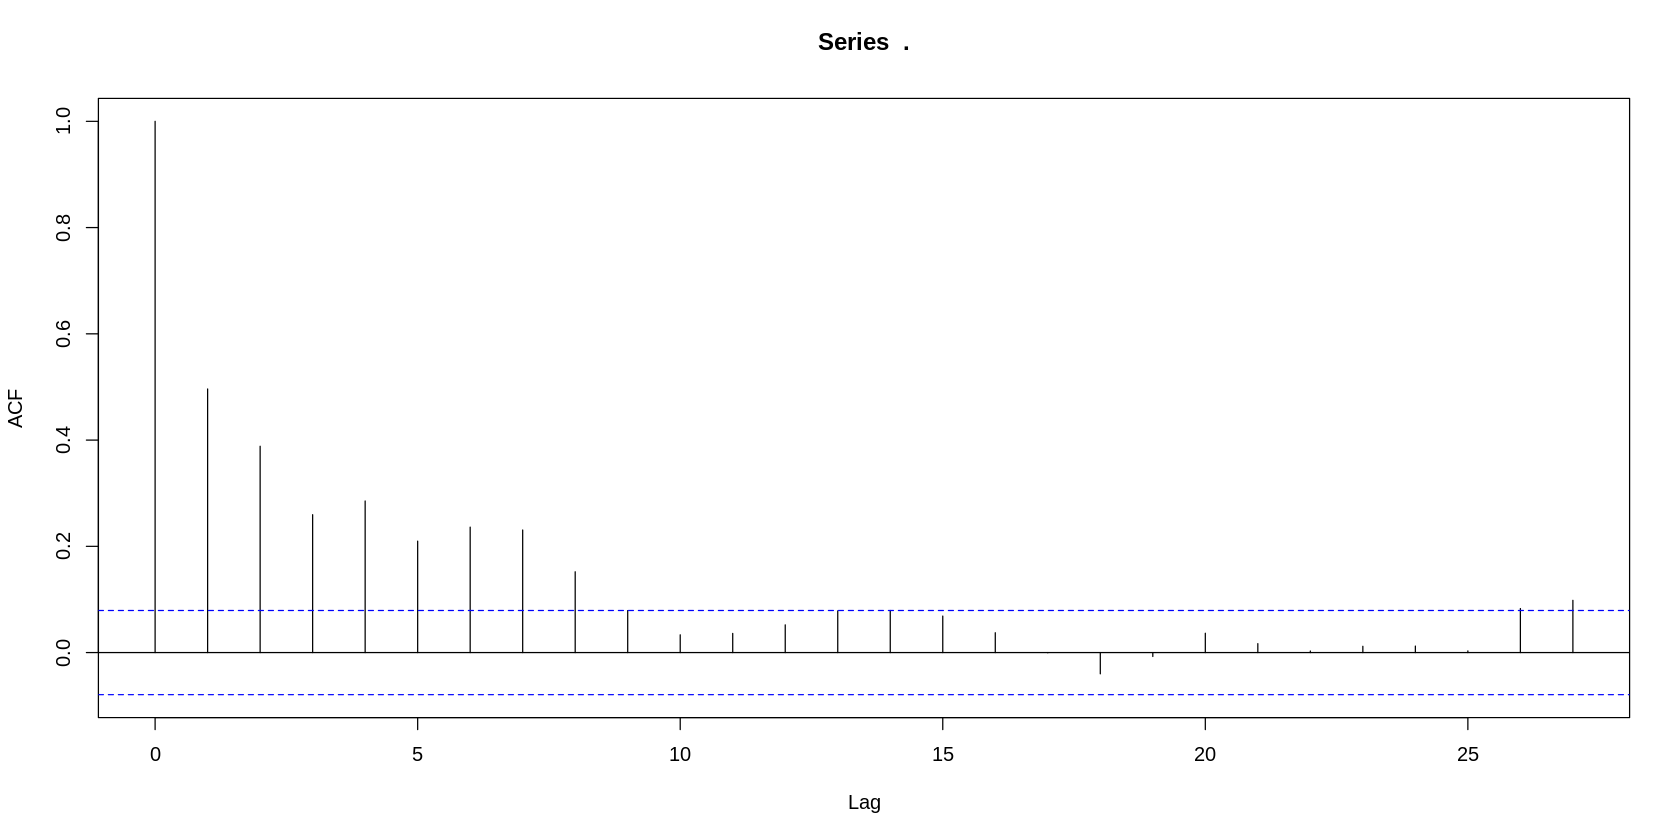

In [ ]:
vrp %>%
  pull(vrp) %>%
  acf()

Major difference is we're looking at more granular daily data as compared to the SPX VRP. That said, this is one of the strongest effects I've seen in crypto so far. Or I've got massive data issues right now.

Next up is "benign" version. Obviously not comparable to SPX, so I eyeball at "50".

`geom_smooth()` using formula = 'y ~ x'


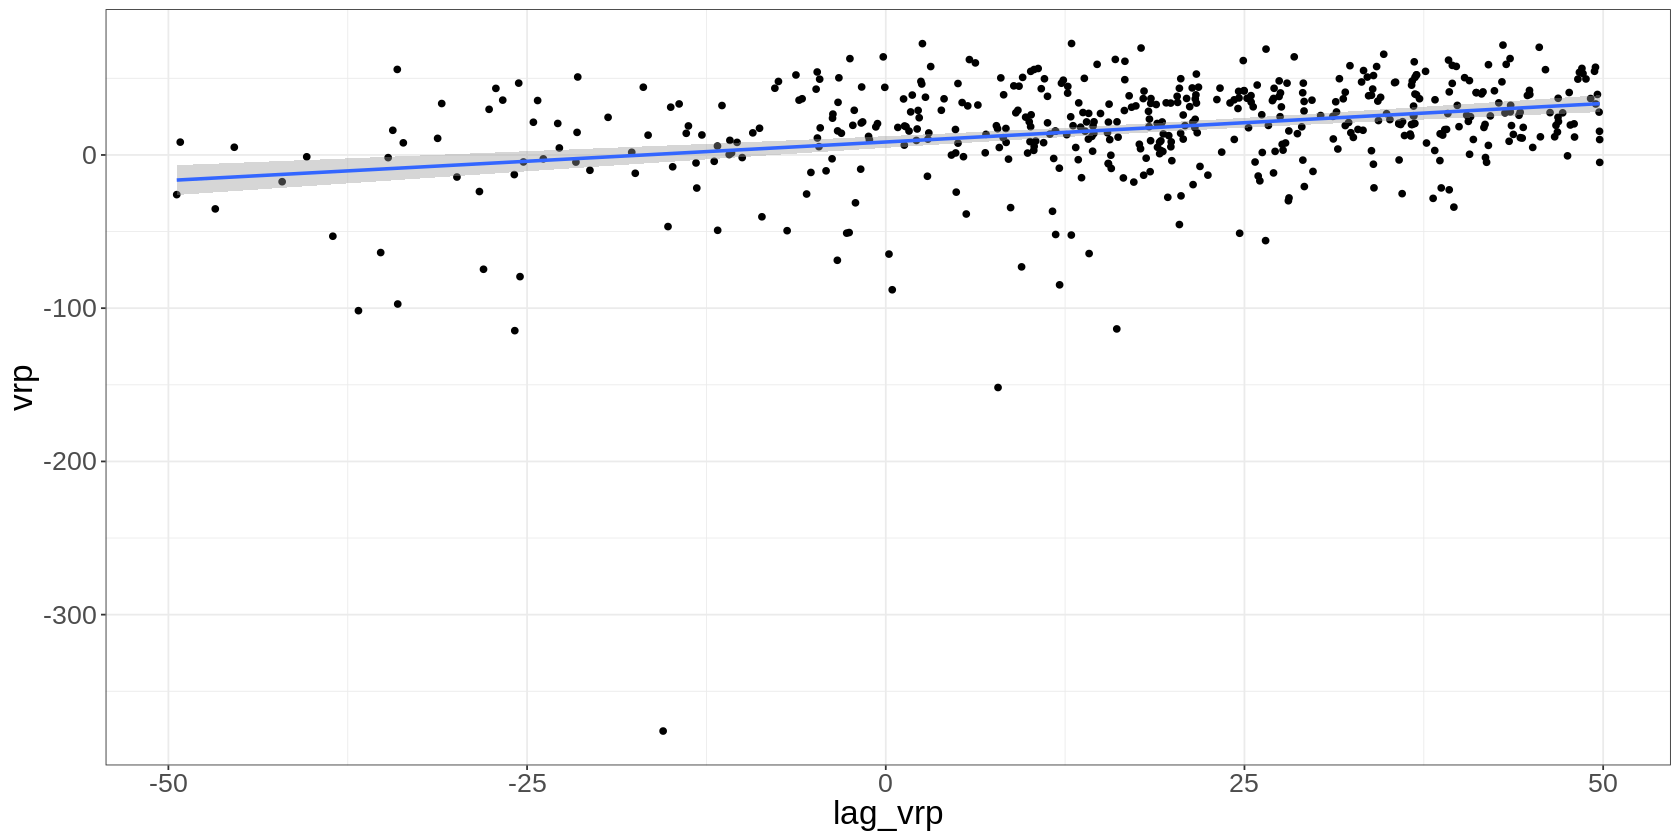

In [ ]:
vrp_benign  <- vrp %>%
  mutate(lag_vrp = lag(vrp)) %>%
  filter(abs(lag_vrp) < 50)

vrp_benign %>%
 na.omit() %>%
 ggplot(aes(x=lag_vrp, y=vrp)) +
  geom_point() +
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


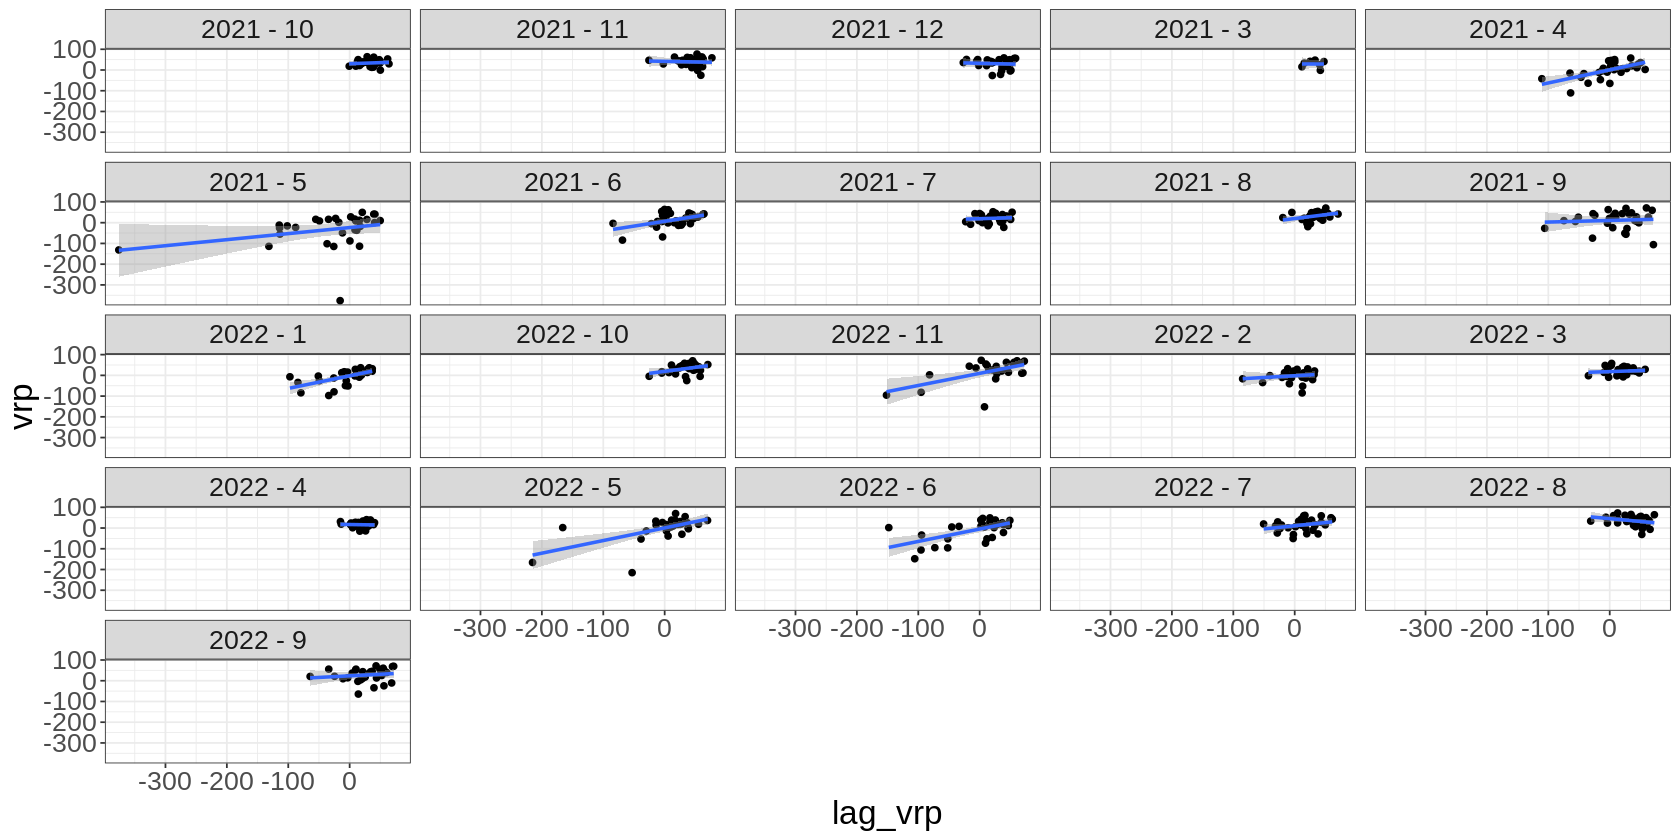

In [ ]:
vrp %>%
  mutate(
    year = lubridate::year(date),
    month = lubridate::month(date),
    yearmonth = paste(year,'-', month),
    ) %>%
  mutate(lag_vrp = lag(vrp)) %>%
  ggplot(aes(x=lag_vrp, y=vrp)) +
    geom_point() +
    geom_smooth(method = 'lm') +
    facet_wrap(~yearmonth)

So there seems to be a persistent effect here. There's also huge negative skew that comes with that fatter crypto vrp.

## IVTS & ATM IV

We've got some fun while going through the first part. That said, crypto market is still immature with small amount of data we're working with. Even more, we've yet gone into term structure of this implied volatility. Even bigger problem is that when we actually look at Dvol number and actual ATM IV of 30-day options looks like there's 10% difference. While there's no easy public API to get that more realistic IV data right now let alone historical observations, I've obtained a rather solid source computed from options and will be using that in the next section.

Follow along with [2022 Review and Alternative Implementations](https://colab.research.google.com/drive/1X8crftLPQVpASmSxJFnCCm2Te_K6d2qS?usp=sharing#scrollTo=iLDnLYbfAaxT)

## Data

Let's gather the equivalent data

- SPVIXSTR == Dvol
- VIX == 1m ATM IV
- VIX3M == 3m ATM IV
- VVIX == Volatility of 1m ATM IV

In [ ]:
eth_iv <- read.csv(file = '/content/eth_iv.csv')

eth_iv <- eth_iv %>% 
            mutate(datetime = ymd_hms(DateTime),
                    date = floor_date(datetime, 'day'))

eth_iv %>% head()

,DateTime,Month.1,Month.3,Month.6,datetime,date
,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>
1,2020-08-23 19:51:52,93.4,102.0,94.2,2020-08-23 19:51:52,2020-08-23
2,2020-08-23 23:51:57,93.3,103.0,96.1,2020-08-23 23:51:57,2020-08-23
3,2020-08-24 03:52:07,92.7,102.1,93.6,2020-08-24 03:52:07,2020-08-24
4,2020-08-24 07:52:16,89.1,101.8,93.4,2020-08-24 07:52:16,2020-08-24
5,2020-08-24 11:52:25,85.0,101.1,93.0,2020-08-24 11:52:25,2020-08-24
6,2020-08-24 15:52:35,87.3,102.6,92.9,2020-08-24 15:52:35,2020-08-24


Convert to daily observations

In [ ]:
iv <- eth_iv %>%
              group_by(date) %>%
                summarise(
                      m1 = first(Month.1),
                      m3 = first(Month.3),
                      m6 = first(Month.6)
                      ) %>%
                na.omit()

iv %>% head()

date,m1,m3,m6
<dttm>,<dbl>,<dbl>,<dbl>
2020-08-23,93.4,102.0,94.2
2020-08-24,92.7,102.1,93.6
2020-08-25,83.6,98.4,92.2
2020-08-26,86.4,99.3,92.8
2020-08-27,81.2,96.6,89.6
2020-08-28,79.6,96.5,89.1


Calculate volatiltiy of m1 as proxy of VVIX using 30d rolling window

In [ ]:
iv <- iv %>% 
    arrange(date) %>%
    mutate(log_m1 = log(m1 / lag(m1)),
            vm1 = slide_index_dbl(
              log_m1, date, sd, .before = days(30)) 
              * sqrt(365) * 100) %>%
    na.omit()
  
iv %>% head()

date,m1,m3,m6,log_m1,vm1
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-09-23,68.2,74.7,72.3,-0.054221554,144.7678
2020-09-24,73.4,76.6,73.9,0.073479371,147.5870
2020-09-25,73.2,77.9,74.7,-0.002728515,143.6263
2020-09-26,63.2,71.5,69.0,-0.146891120,151.0206
2020-09-27,61.8,71.2,68.7,-0.022400937,149.9689
2020-09-28,61.3,70.3,68.6,-0.008123522,149.9174


Group together data to create features dataframe

In [ ]:
features <- eth_dvol %>%
  left_join(iv, by = 'date') %>%
  mutate(
    basis_ratio = m1 / m3, # James used m3 / m1
    basis_ratio_bucket = ntile(basis_ratio, 10), # This is sorting the opposite way from original IVTS papers!!
    M1_bucket = ntile(m1, 10),
    VM1_bucket = ntile(vm1, 10),
    M1_1df = log(lead(m1, 1) / m1),
    M1_2df = log(lead(m1,2) / lead(m1,1)),
    DVOL_1df = log(lead(dvol, 1) / dvol),
    DVOL_2df = log(lead(dvol,2) / lead(dvol,1))) %>%
    na.omit()

features %>% tail()

date,dvol,m1,m3,m6,log_m1,vm1,basis_ratio,basis_ratio_bucket,M1_bucket,VM1_bucket,M1_1df,M1_2df,DVOL_1df,DVOL_2df
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2022-11-18,101.21,79.6958,83.7310,78.0505,-0.12689537,219.3375,0.9518076,6,4,10,-0.03865161,-0.05835395,-0.02268396,-0.04707847
2022-11-19,98.94,76.6742,80.2702,80.9758,-0.03865161,219.6453,0.9552013,6,3,10,-0.05835395,0.14914584,-0.04707847,0.14784994
2022-11-20,94.39,72.3280,77.1582,79.1753,-0.05835395,220.6893,0.9373987,4,2,10,0.14914584,0.01112399,0.14784994,-0.04094385
2022-11-21,109.43,83.9614,83.3532,80.9104,0.14914584,226.3118,1.0072967,8,4,10,0.01112399,-0.01349933,-0.04094385,-0.02301609
2022-11-22,105.04,84.9006,83.3566,79.5397,0.01112399,226.1317,1.0185228,9,5,10,-0.01349933,-0.04719847,-0.02301609,-0.09037353
2022-11-23,102.65,83.7622,80.2382,77.3153,-0.01349933,225.8819,1.0439192,10,4,10,-0.04719847,-0.02164927,-0.09037353,-0.02264736


## Plot distribution of IVTS, sorted into deciles

Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


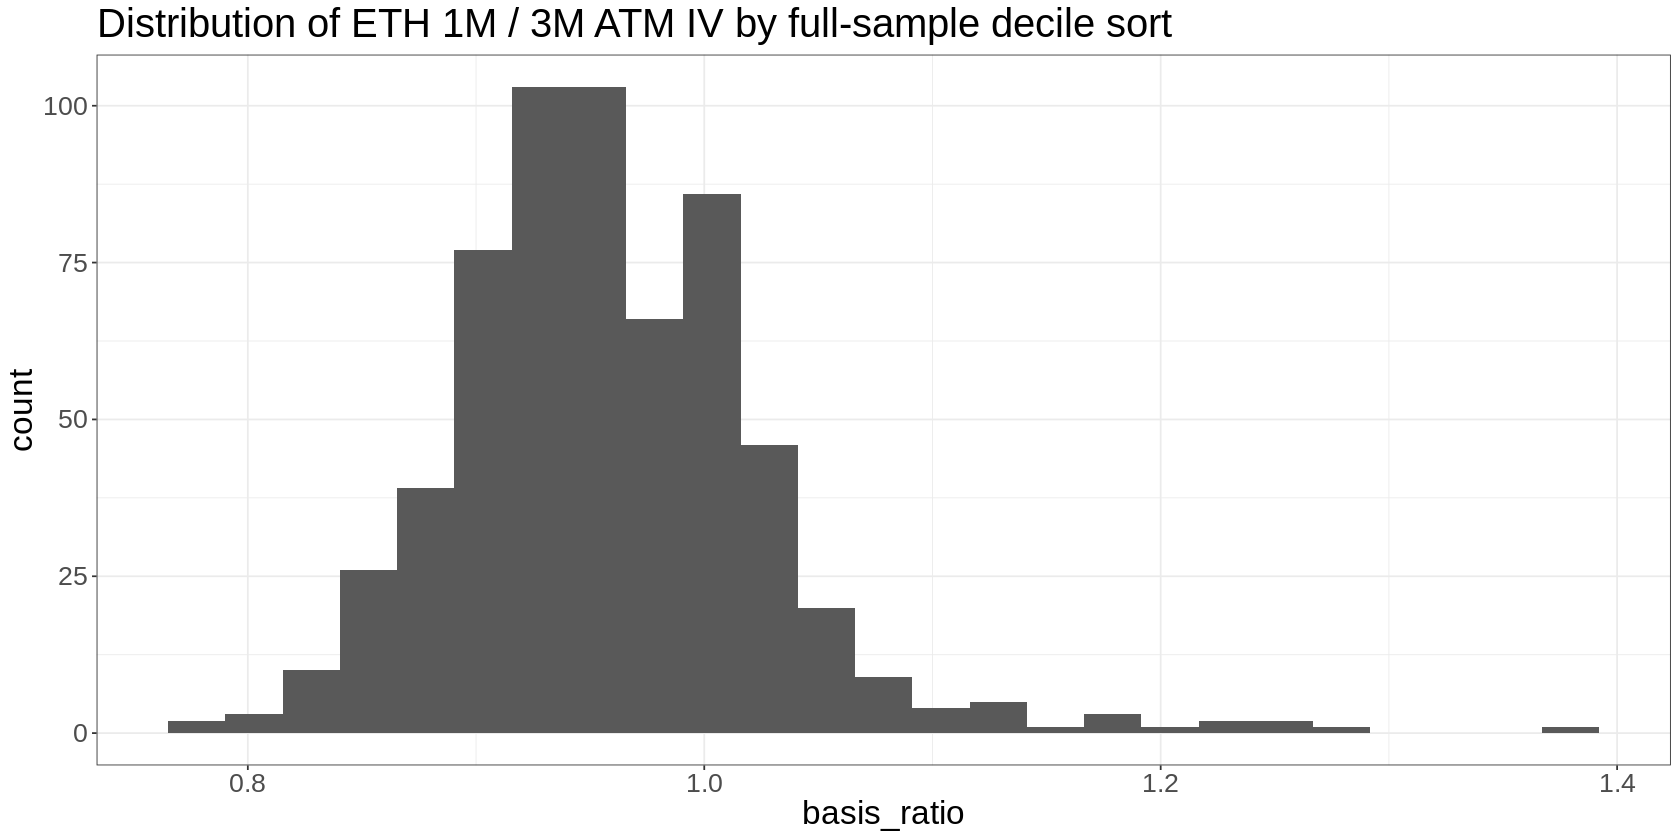

In [ ]:
features %>%
  select(date, basis_ratio, basis_ratio_bucket) %>%
  na.omit() %>%
  mutate(basis_ratio_decile = factor(basis_ratio_bucket)) %>%
  ggplot(aes(x=basis_ratio, color = basis_ratio_bucket, fill = basis_ratio_bucket)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of ETH 1M / 3M ATM IV by full-sample decile sort')

## Plot distribution of M1, sorted into deciles

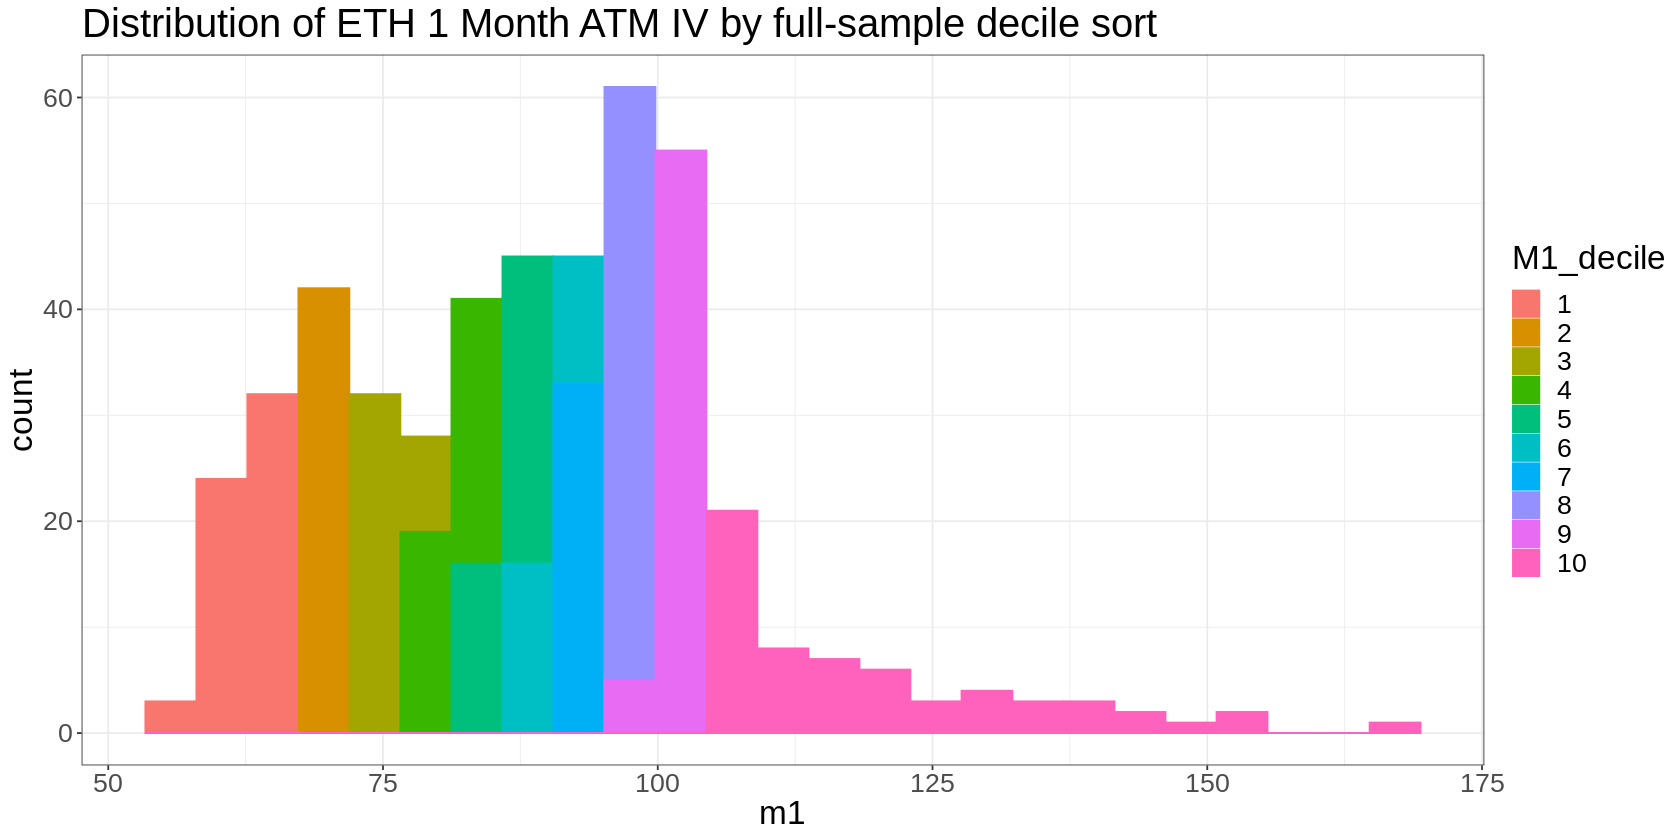

In [ ]:
features %>%
  select(date, m1, M1_bucket) %>%
  na.omit() %>%
  mutate(M1_decile = factor(M1_bucket)) %>%
  ggplot(aes(x=m1, color = M1_decile, fill = M1_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of ETH 1 Month ATM IV by full-sample decile sort')

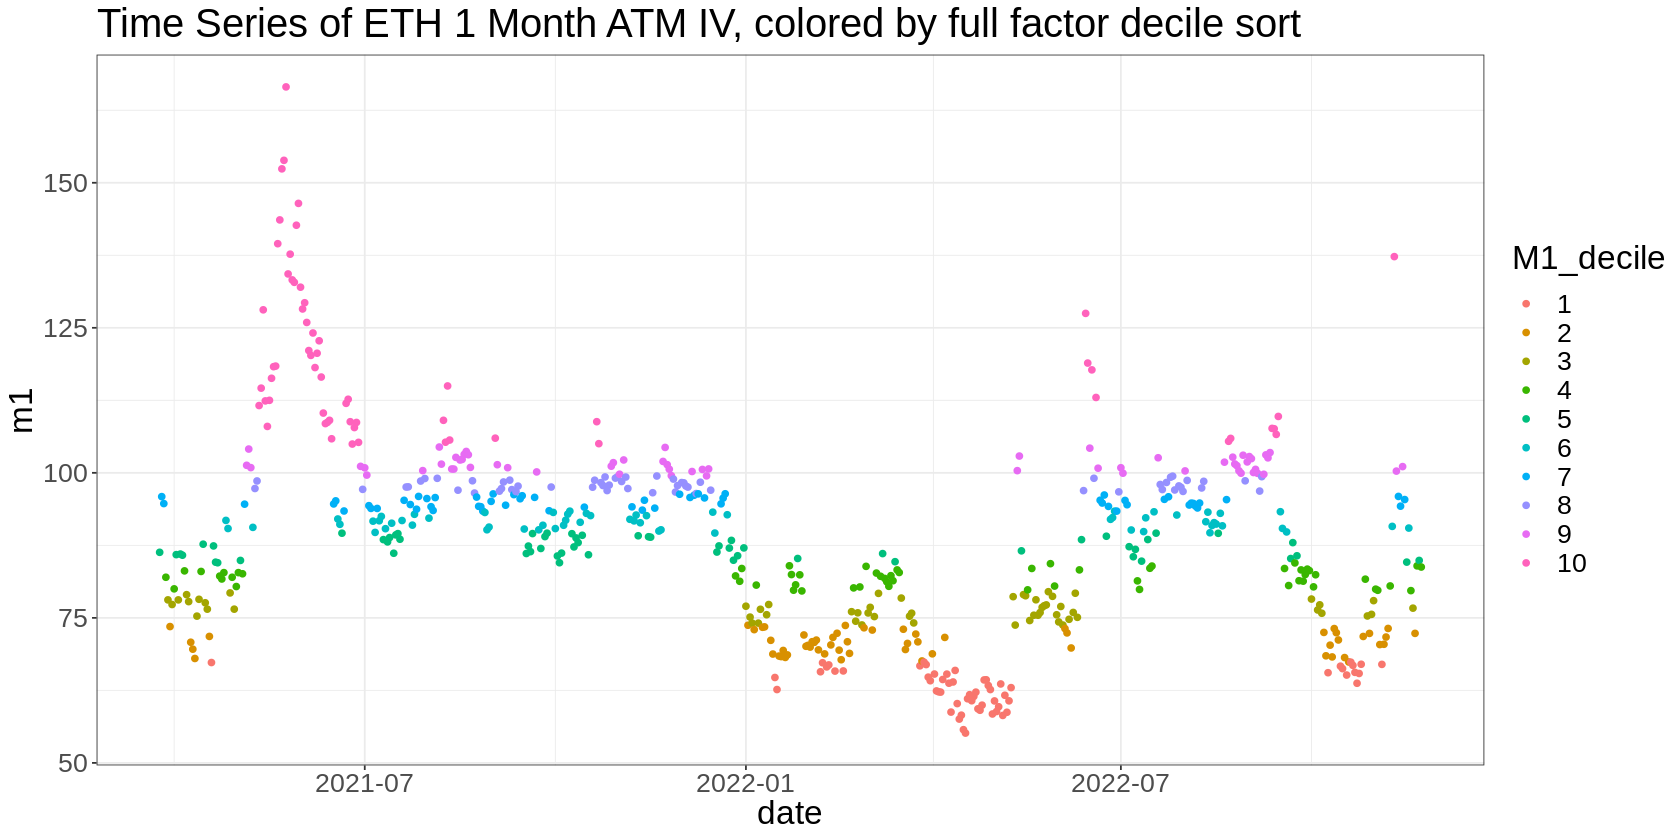

In [ ]:
features %>%
  select(date, m1, M1_bucket) %>%
  na.omit() %>%
  mutate(M1_decile = factor(M1_bucket)) %>%
  ggplot(aes(x=date, y=m1, color=M1_decile)) +
    geom_point() +
    ggtitle('Time Series of ETH 1 Month ATM IV, colored by full factor decile sort')

In [ ]:
features %>% 
  select(date, m1, M1_bucket) %>%
  na.omit() %>%
  group_by(M1_bucket) %>%
  summarise(
    min = min(m1), 
    max = max(m1),
    range = max-min
  )

M1_bucket,min,max,range
<int>,<dbl>,<dbl>,<dbl>
1,55.1344,67.3628,12.2284
2,67.3967,73.7259,6.3292
3,73.7559,79.5088,5.7529
4,79.6418,84.4698,4.8280
5,84.5000,89.6022,5.1022
6,89.6188,93.3974,3.7786
7,93.4034,96.3916,2.9882
8,96.4282,99.4515,3.0233
9,99.4769,104.4502,4.9733


Notably, while I'm calculating basis level as per Chrilly Donninger. The result is completely opposite. Where the for short volatility trades, basis in contango is recommended for tradfi (equities it seems). James' 2022 analysis also found the same effect.

It's good to remind myself that crypto isn't the same asset class and that's why we do research to find effects. Here in crypto, basis below 1 is also the bulk of the distribution but it's more effective to sell vol when basis is above 1, hence higher basis level score performs. It might also be that since crypto is much more volatile than traditional traded assets with huge volatility of volatility, mean-reversion of volatility kicks in sooner.

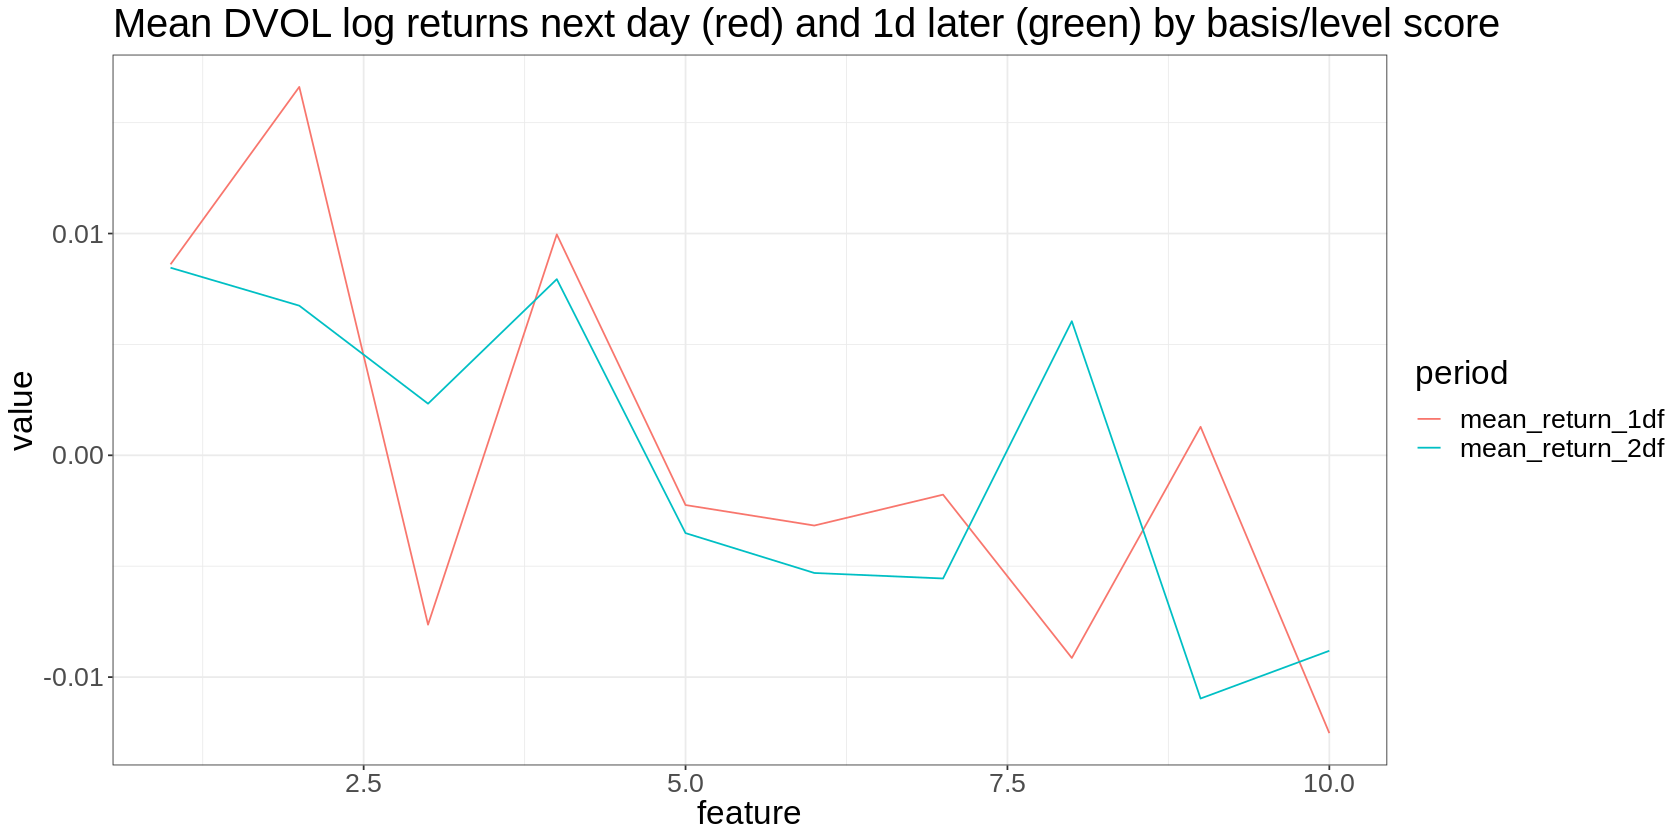

In [ ]:
features <- features %>%
  mutate(
    basis_level_score = ntile((basis_ratio_bucket + M1_bucket), 10),
  ) 

features %>%
  mutate(feature = basis_level_score) %>%
  select(
    date,
    feature,
    DVOL_1df,
    DVOL_2df
  ) %>% 
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(DVOL_1df),
    mean_return_2df = mean(DVOL_2df)
  )  %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + 
    geom_line() +
    ggtitle('Mean DVOL log returns next day (red) and 1d later (green) by basis/level score')

## Volatility of Volatility

Trying out VM1 as predictor of M1 ATM IV returns

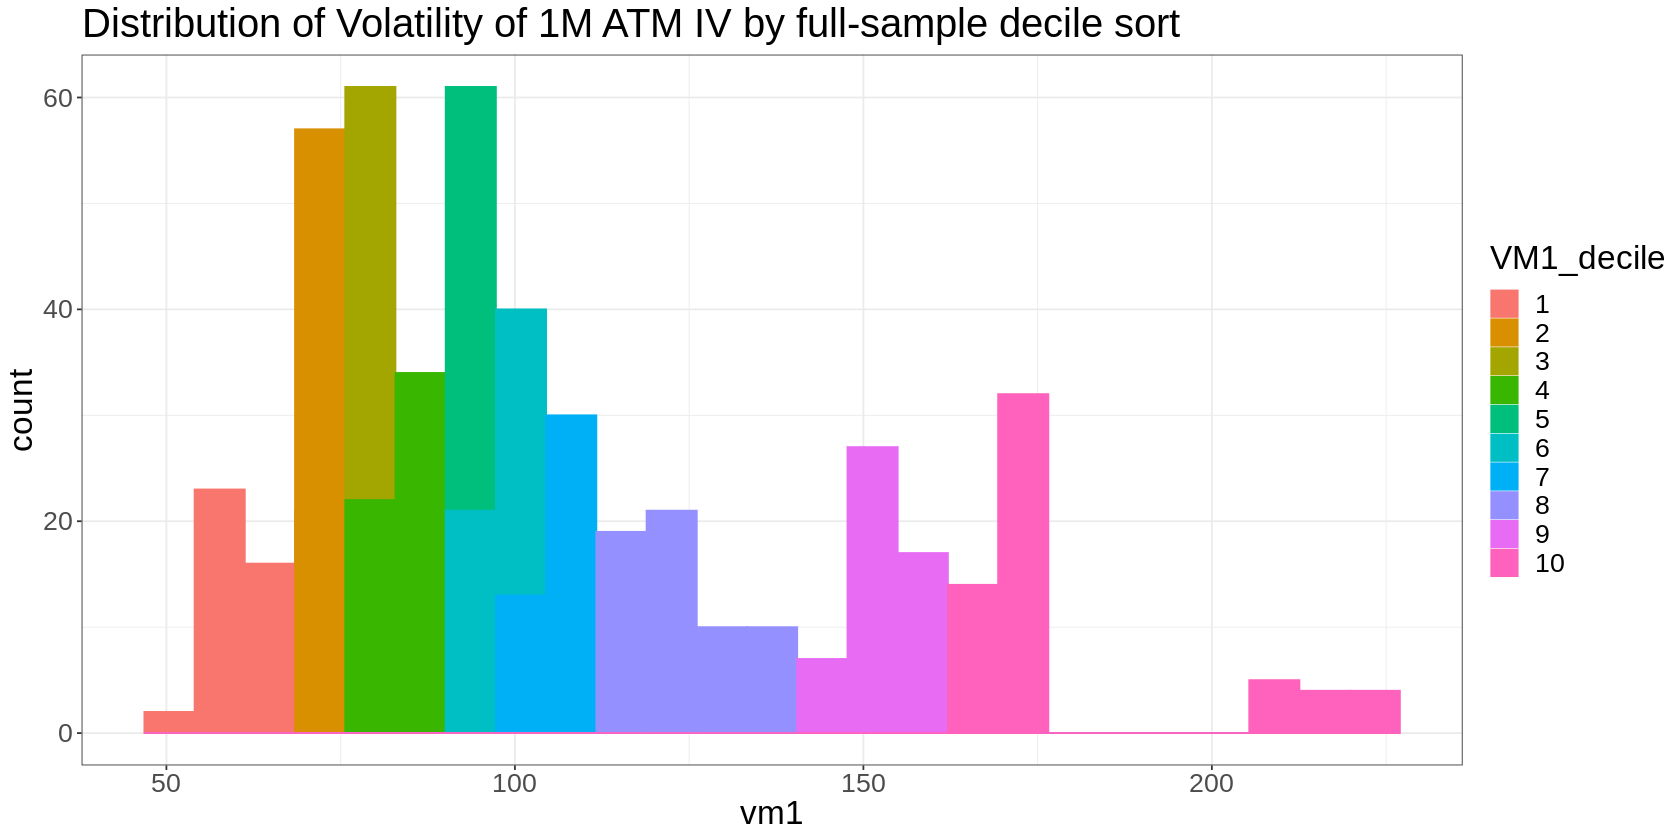

In [ ]:
features %>%
  select(date, vm1, VM1_bucket) %>%
  na.omit() %>%
  mutate(VM1_decile = factor(VM1_bucket)) %>%
  ggplot(aes(x=vm1, color = VM1_decile, fill =VM1_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of Volatility of 1M ATM IV by full-sample decile sort')

A notable difference from VVIX is that there seems to be periods where high IV is isn't volatile by itself, like M1 Bucket 9 at almost 100% IV having VM1 bucket 2 vol.

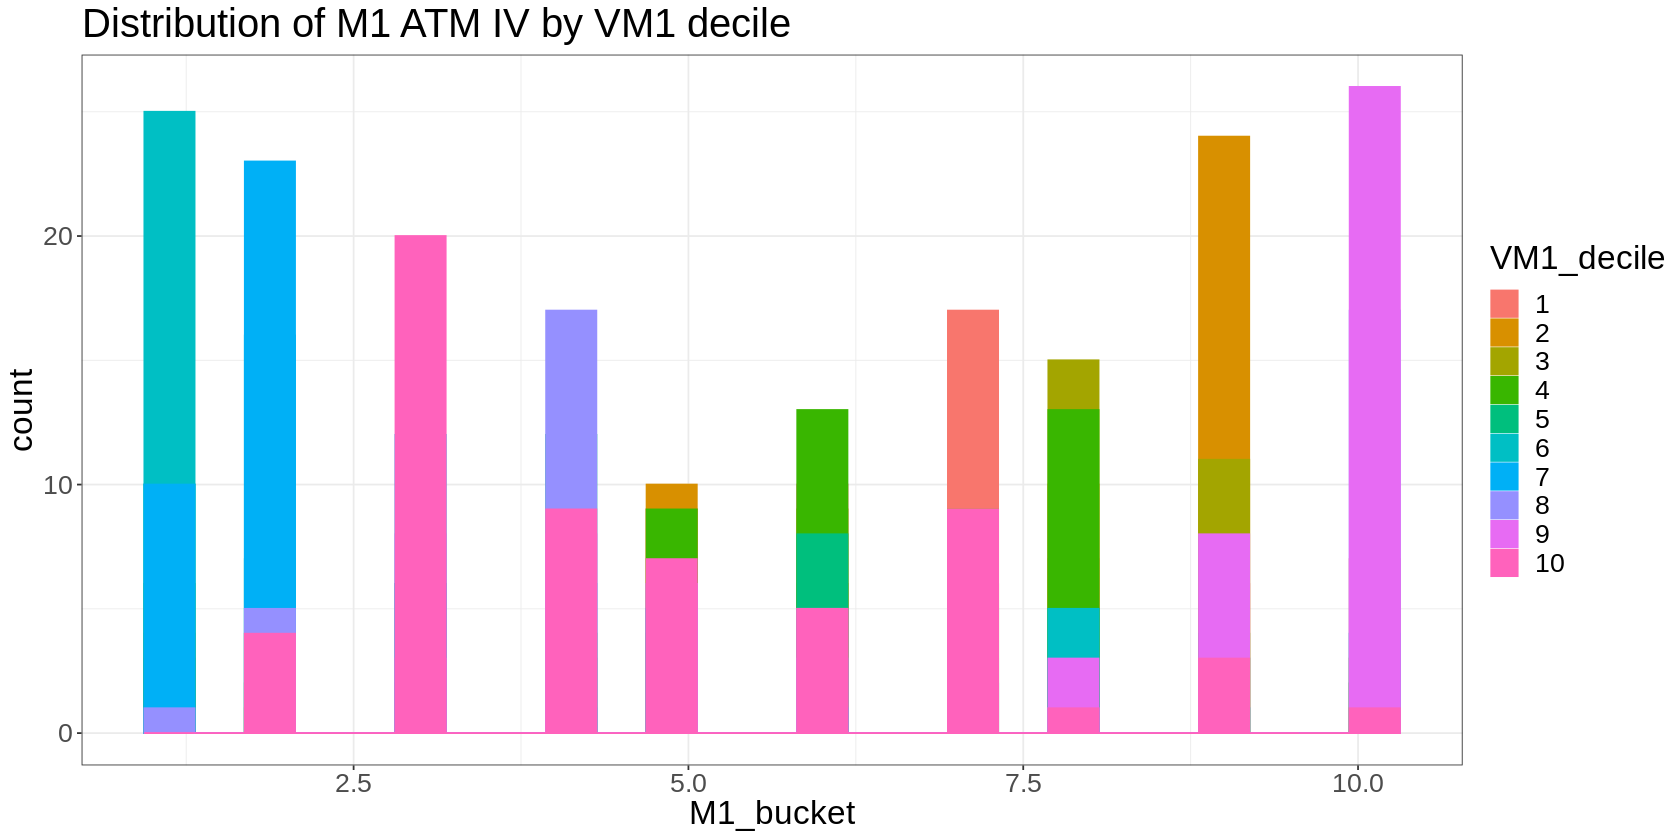

In [ ]:
features %>%
  select(date, M1_bucket, VM1_bucket) %>%
  na.omit() %>%
  mutate(VM1_decile = factor(VM1_bucket)) %>%
  ggplot(aes(x=M1_bucket, color = VM1_decile, fill = VM1_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of M1 ATM IV by VM1 decile')

Oh look how clear we see the FTX meltdown in the VM1 all time high!

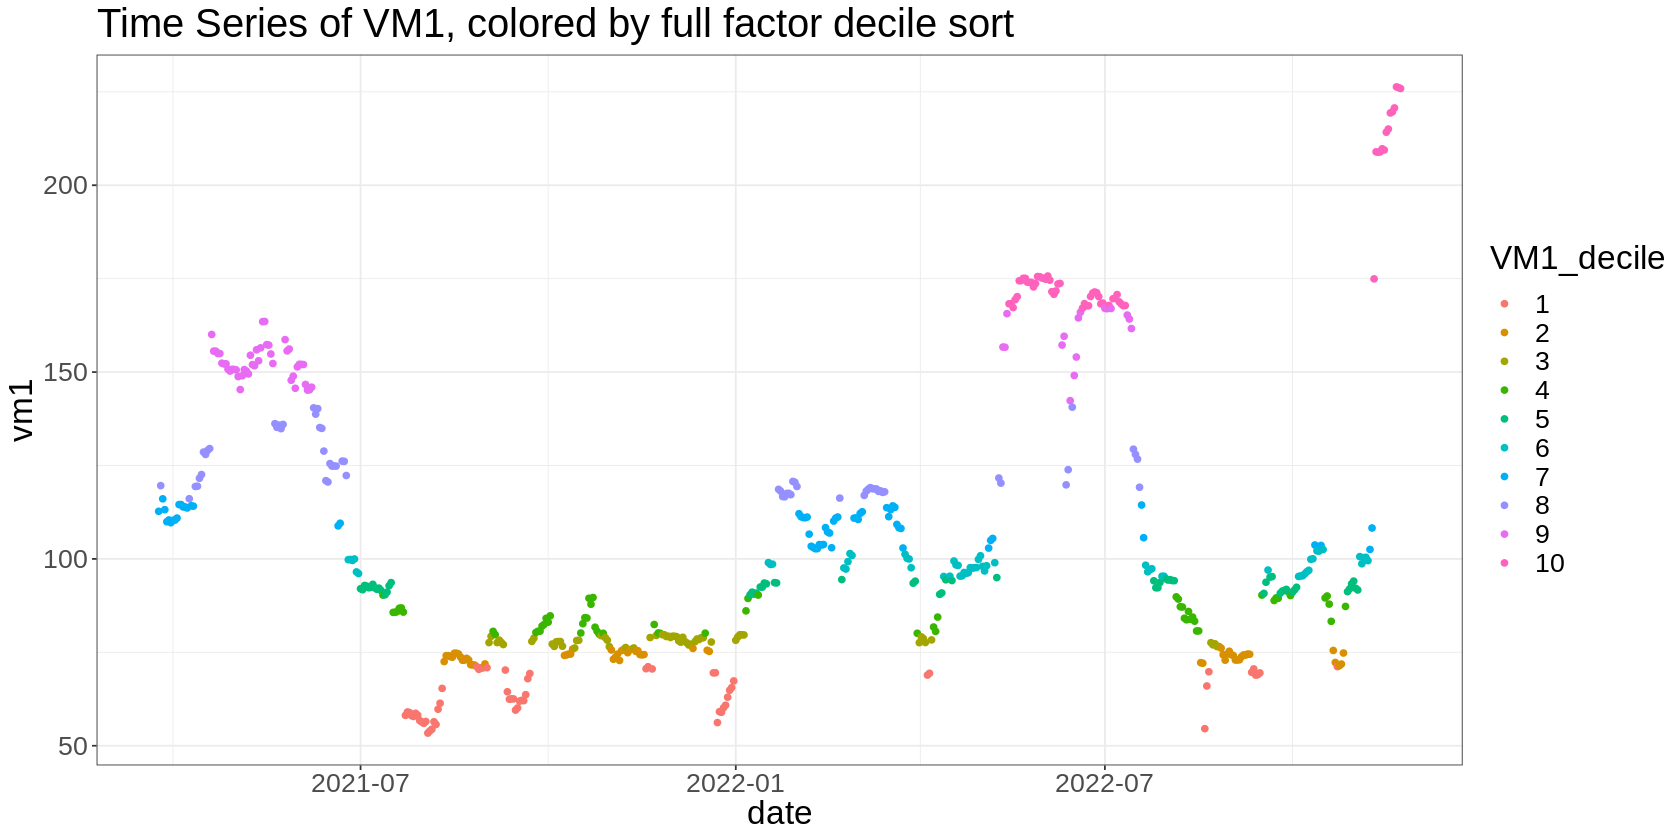

In [ ]:
features %>%
  select(date, vm1, VM1_bucket) %>%
  na.omit() %>%
  mutate(VM1_decile = factor(VM1_bucket)) %>%
  ggplot(aes(x=date, y=vm1, color=VM1_decile)) +
    geom_point() +
    ggtitle('Time Series of VM1, colored by full factor decile sort')

In [ ]:
features %>% 
  select(date, vm1, VM1_bucket) %>%
  na.omit() %>%
  group_by(VM1_bucket) %>%
  summarise(
    min = min(vm1), 
    max = max(vm1),
    range = max-min
  )

VM1_bucket,min,max,range
<int>,<dbl>,<dbl>,<dbl>
1,53.37818,71.17594,17.797768
2,71.41410,76.11657,4.702469
3,76.15307,79.72258,3.569512
4,79.74603,90.31518,10.569153
5,90.39360,95.26683,4.873233
6,95.29889,102.49971,7.200820
7,102.52653,116.07222,13.545699
8,116.09955,140.60683,24.507276
9,142.34467,167.05697,24.712303


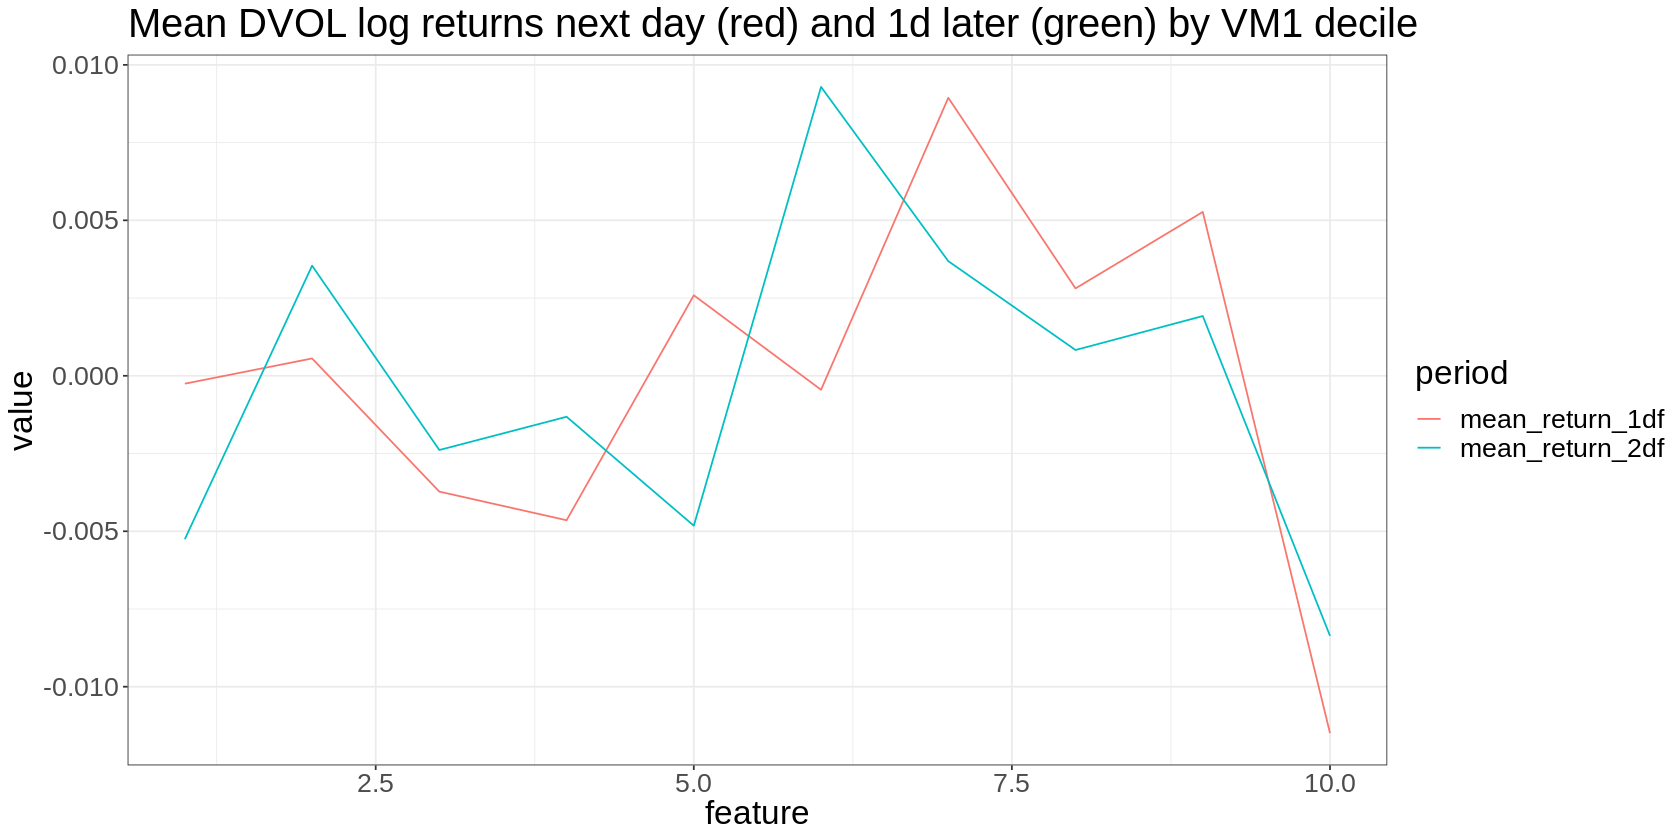

In [ ]:
features %>%
  mutate(feature = VM1_bucket) %>%
  select(
    date,
    feature,
    DVOL_1df,
    DVOL_2df
  ) %>% 
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(DVOL_1df),
    mean_return_2df = mean(DVOL_2df)
  ) %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + 
    geom_line() + 
    ggtitle('Mean DVOL log returns next day (red) and 1d later (green) by VM1 decile')

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


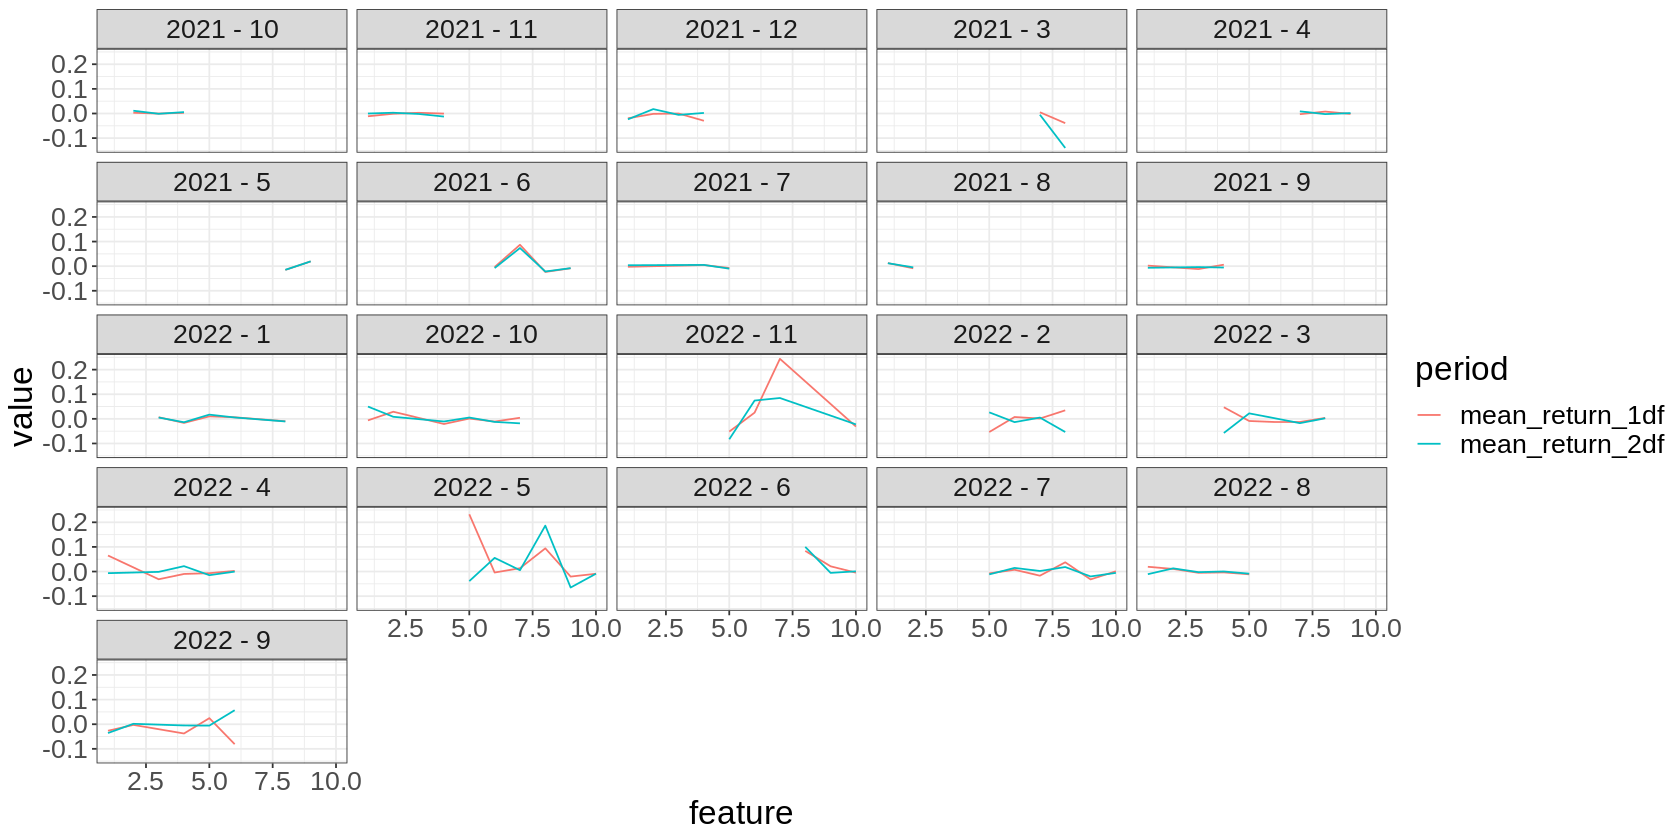

In [ ]:
features %>%
  mutate(
    feature = VM1_bucket,
    year = lubridate::year(date),
    month = lubridate::month(date),
    yearmonth = paste(year,'-', month),) %>%
  select(
    yearmonth,
    feature,
    DVOL_1df,
    DVOL_2df
  ) %>% 
  na.omit() %>%
  group_by(feature, yearmonth) %>%
  summarise(
    mean_return_1df = mean(DVOL_1df),
    mean_return_2df = mean(DVOL_2df)
  ) %>%
  pivot_longer(-c(feature, yearmonth), names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + geom_line() + facet_wrap(~yearmonth)

# Create a combined sort.

High M1 and high VM1 are kinda correlated.

So create a composite score which is:

- 50% M3 / M1 Basis Decile
- 25% M1 Level Decile
- 25% VM1 Level Decile

Rounded to nearest integer

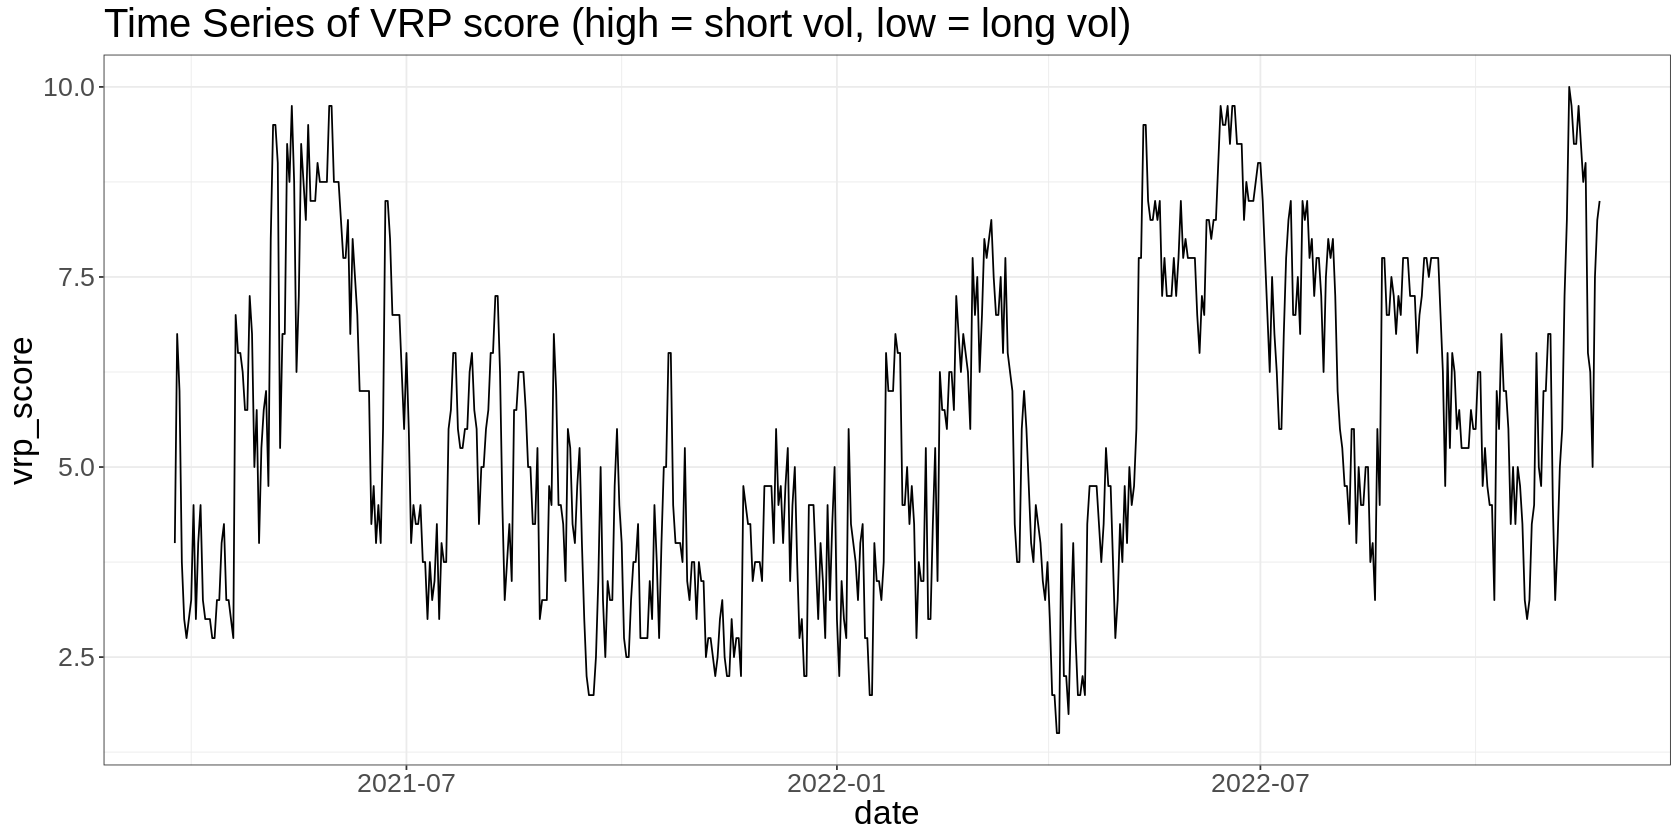

In [ ]:
features <- features %>%
  mutate(
    vrp_score = (0.5 * basis_ratio_bucket) + (0.25 * M1_bucket) + (0.25 * VM1_bucket),
    vrp_score_floor = floor(vrp_score)
  ) 

features %>%
  select(date, vrp_score) %>%
  na.omit() %>%
  ggplot(aes(x=date, y=vrp_score)) +
    geom_line() +
    ggtitle('Time Series of VRP score (high = short vol, low = long vol)')

In [ ]:
features %>% tail()

date,dvol,m1,m3,m6,log_m1,vm1,basis_ratio,basis_ratio_bucket,M1_bucket,VM1_bucket,M1_1df,M1_2df,DVOL_1df,DVOL_2df,basis_level_score,vrp_score,vrp_score_floor
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2022-11-18,101.21,79.6958,83.7310,78.0505,-0.12689537,219.3375,0.9518076,6,4,10,-0.03865161,-0.05835395,-0.02268396,-0.04707847,5,6.50,6
2022-11-19,98.94,76.6742,80.2702,80.9758,-0.03865161,219.6453,0.9552013,6,3,10,-0.05835395,0.14914584,-0.04707847,0.14784994,4,6.25,6
2022-11-20,94.39,72.3280,77.1582,79.1753,-0.05835395,220.6893,0.9373987,4,2,10,0.14914584,0.01112399,0.14784994,-0.04094385,2,5.00,5
2022-11-21,109.43,83.9614,83.3532,80.9104,0.14914584,226.3118,1.0072967,8,4,10,0.01112399,-0.01349933,-0.04094385,-0.02301609,7,7.50,7
2022-11-22,105.04,84.9006,83.3566,79.5397,0.01112399,226.1317,1.0185228,9,5,10,-0.01349933,-0.04719847,-0.02301609,-0.09037353,8,8.25,8
2022-11-23,102.65,83.7622,80.2382,77.3153,-0.01349933,225.8819,1.0439192,10,4,10,-0.04719847,-0.02164927,-0.09037353,-0.02264736,8,8.50,8


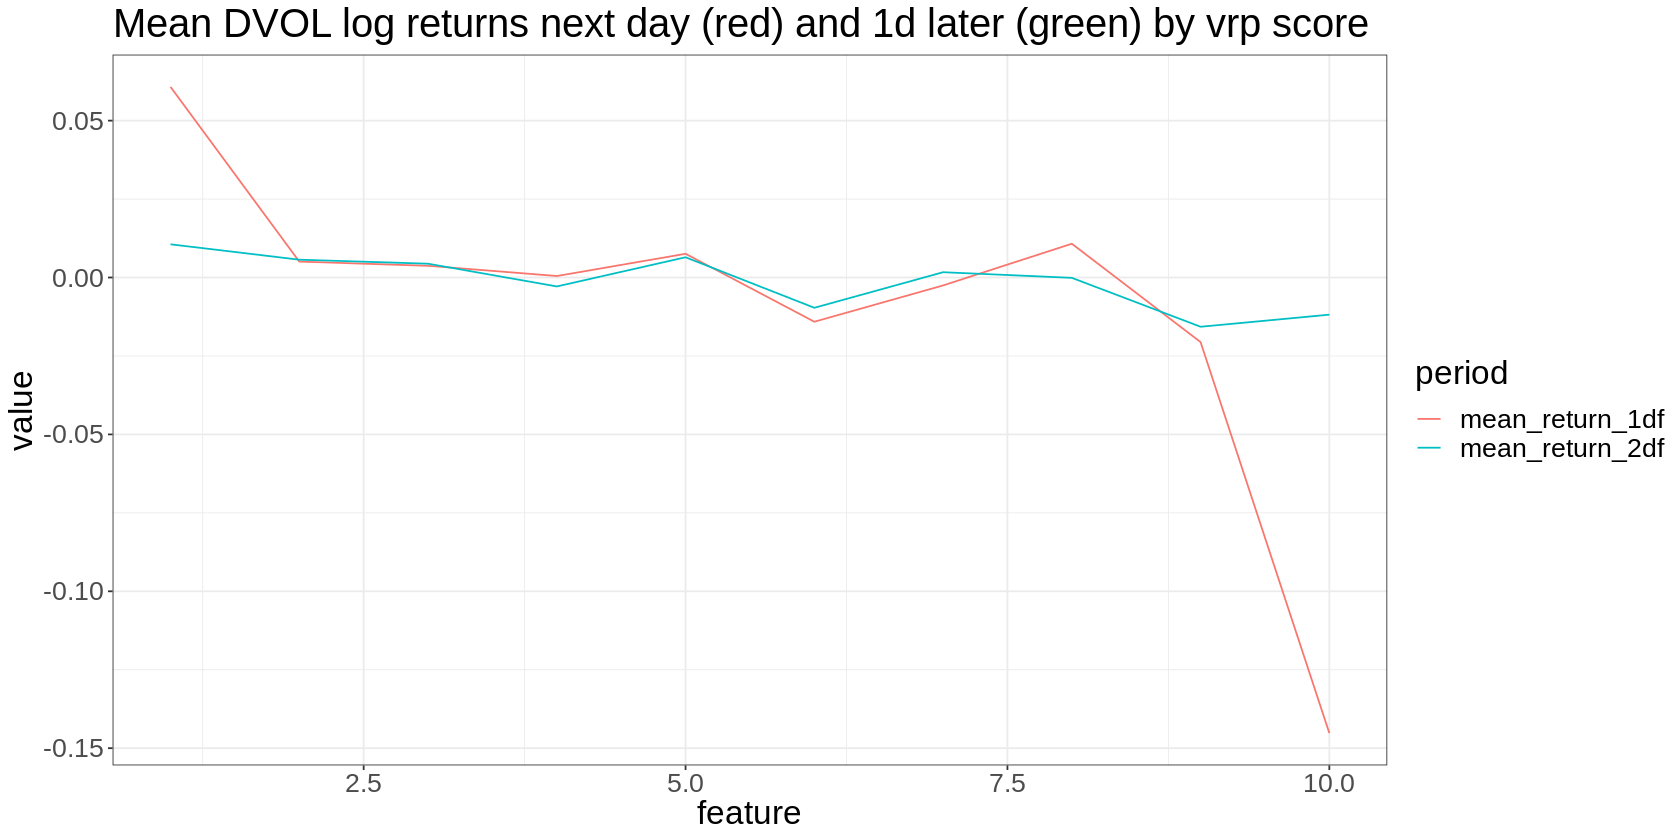

In [ ]:
features %>%
  mutate(feature = vrp_score_floor) %>%
  select(
    date,
    feature,
    DVOL_1df,
    DVOL_2df
  ) %>% 
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(DVOL_1df),
    mean_return_2df = mean(DVOL_2df)
  ) %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + 
    geom_line() + 
    ggtitle('Mean DVOL log returns next day (red) and 1d later (green) by vrp score')

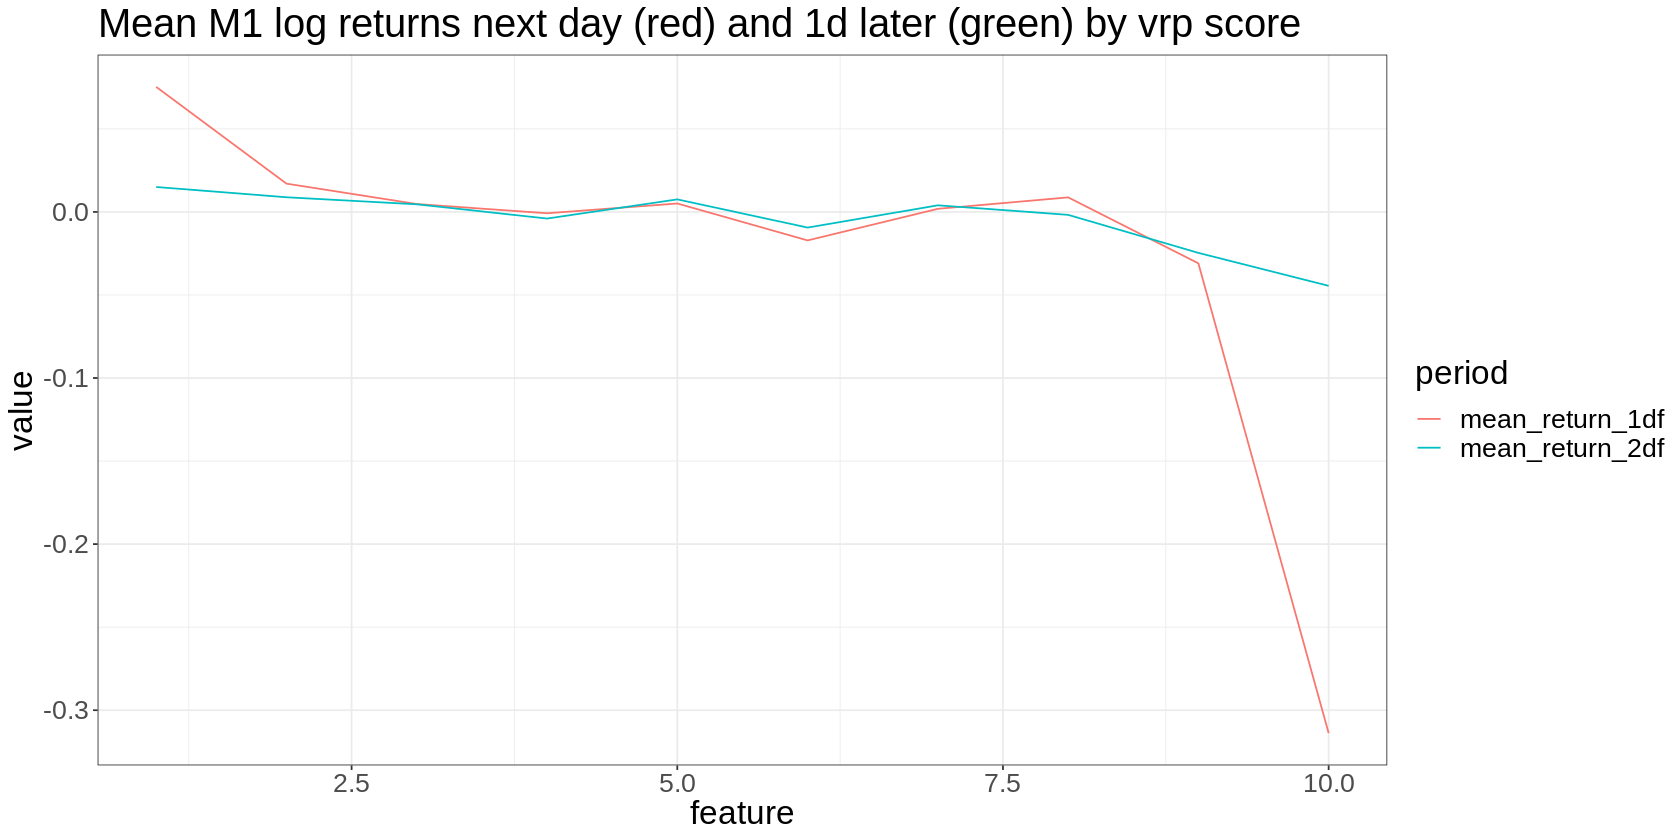

In [ ]:
features %>%
  mutate(feature = vrp_score_floor) %>%
  select(
    date,
    feature,
    M1_1df,
    M1_2df
  ) %>% 
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(M1_1df),
    mean_return_2df = mean(M1_2df)
  ) %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + 
    geom_line() + 
    ggtitle('Mean M1 log returns next day (red) and 1d later (green) by vrp score')

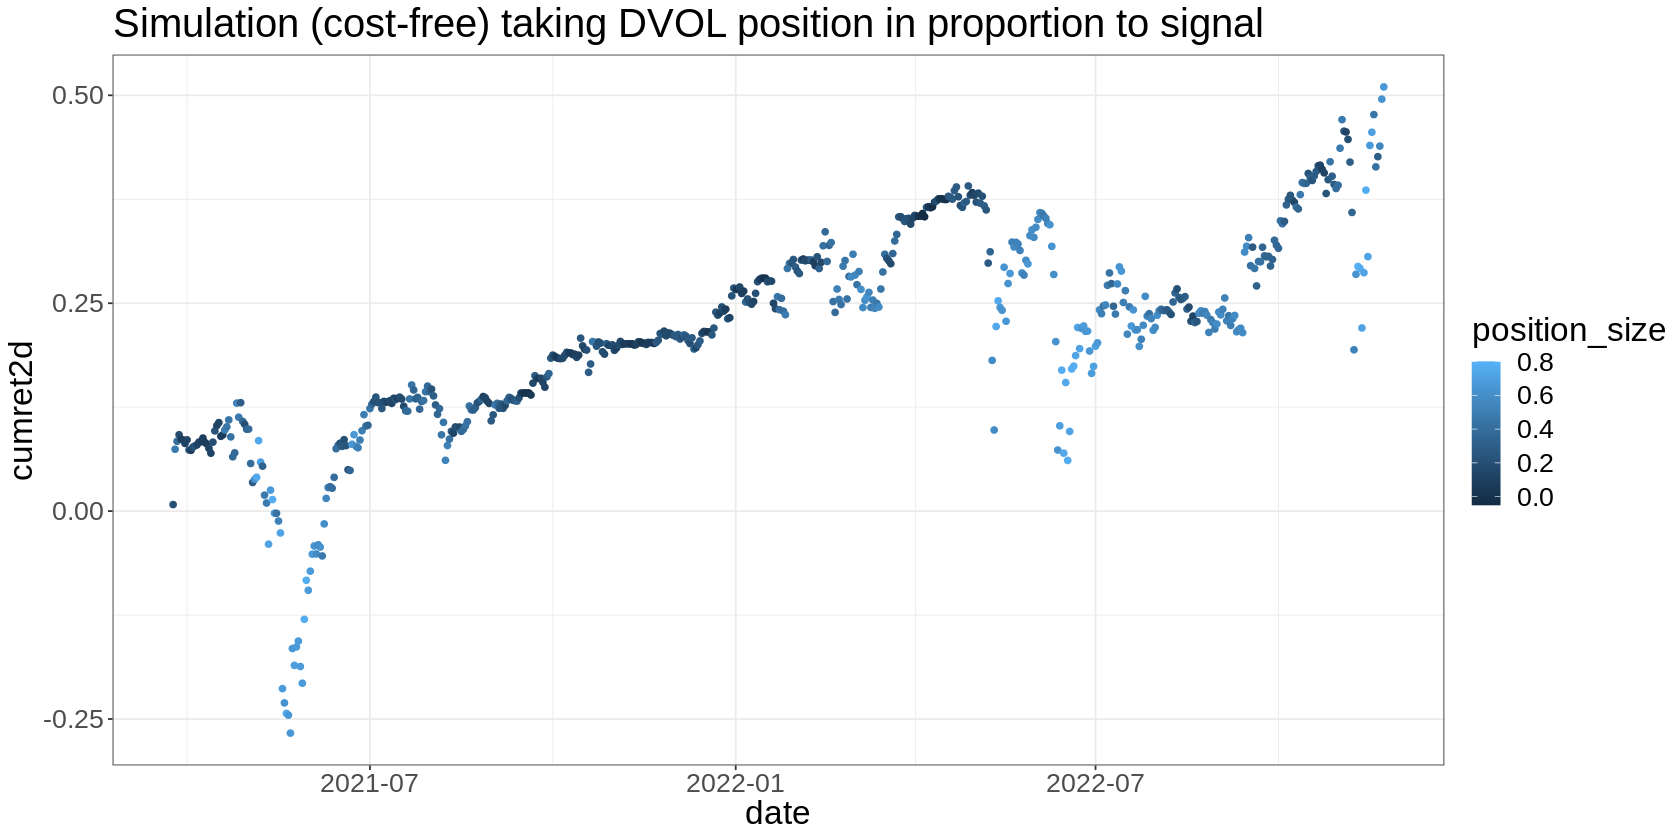

In [ ]:
features %>%
  mutate(
    position_size = (vrp_score - 2) / 10,
    strat2df = position_size * -DVOL_2df
  ) %>%
  select(date, vrp_score, position_size, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret2d = cumsum(strat2df)
  ) %>%
  # filter(date >= '2022-01-01') %>%
  ggplot(aes(x=date, y=cumret2d, color=position_size)) + geom_point() +
  ggtitle('Simulation (cost-free) taking DVOL position in proportion to signal')

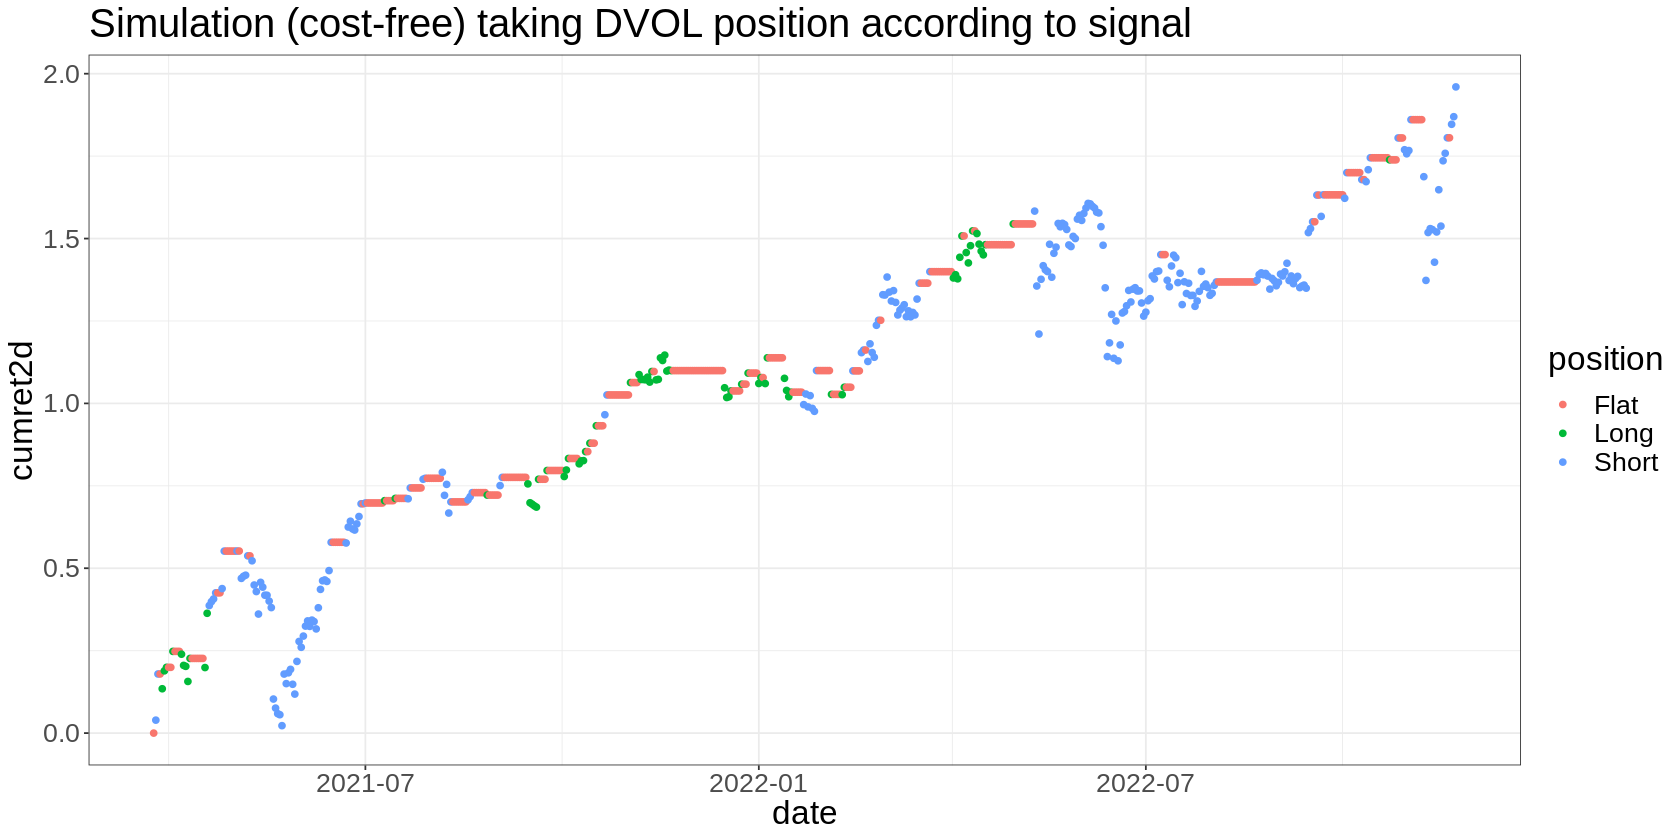

In [ ]:
features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -DVOL_1df, position == 'Long' ~ DVOL_1df, TRUE ~ 0),
    strat2df = case_when(position == 'Short' ~ -DVOL_1df, position == 'Long' ~ DVOL_1df, TRUE ~ 0)
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  ) %>%
  # filter(date >= '2022-01-01') %>%
  ggplot(aes(x=date, y=cumret2d, color=position)) + geom_point() +
  ggtitle('Simulation (cost-free) taking DVOL position according to signal')

# Indicative Performance

First of all, while I've gone with DVOL as proxy for SPVIXSTR in reference to James' 2022 Review, there's not a tradeable thing for DVOL and even short dated options lost their ATM IV a lot more quickly than DVOL drops so I have no idea what it's supposed to reference, you might find it the highest number across all expiries most of the time.

So from here I'll use 1M ATM IV as what we take positions in, as that's a realistic tradeable number you'll find in the market.

- Assume $X assigned to strategy
- Long = Long 0.25 x M1
- Short = Short 0.25 x M1
- Flat = Cash
- Rebalance positions back to target if abs diff > 5% 

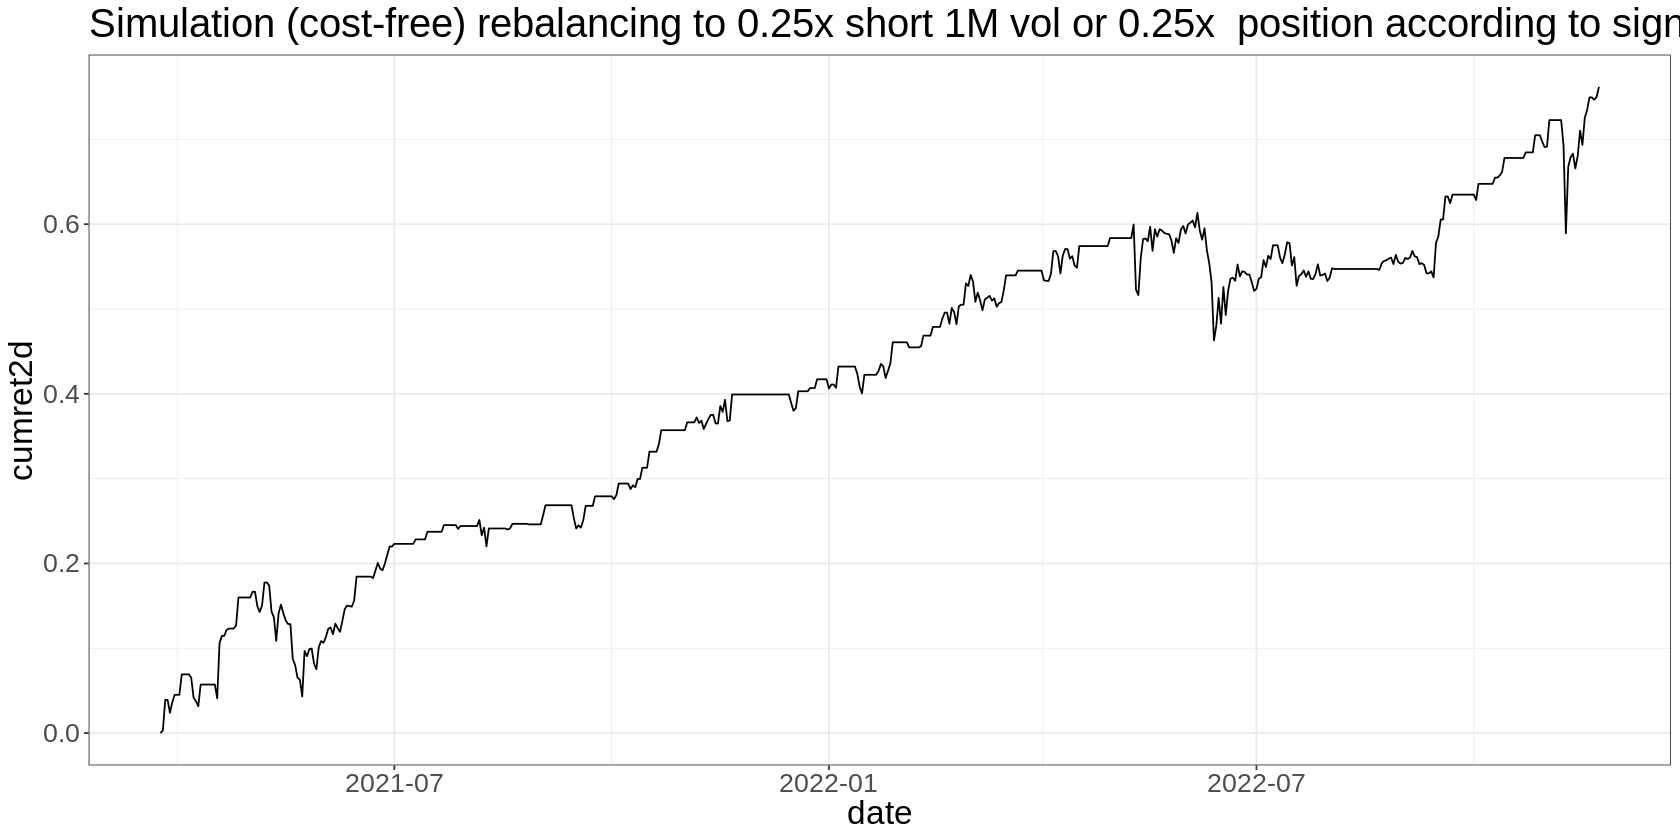

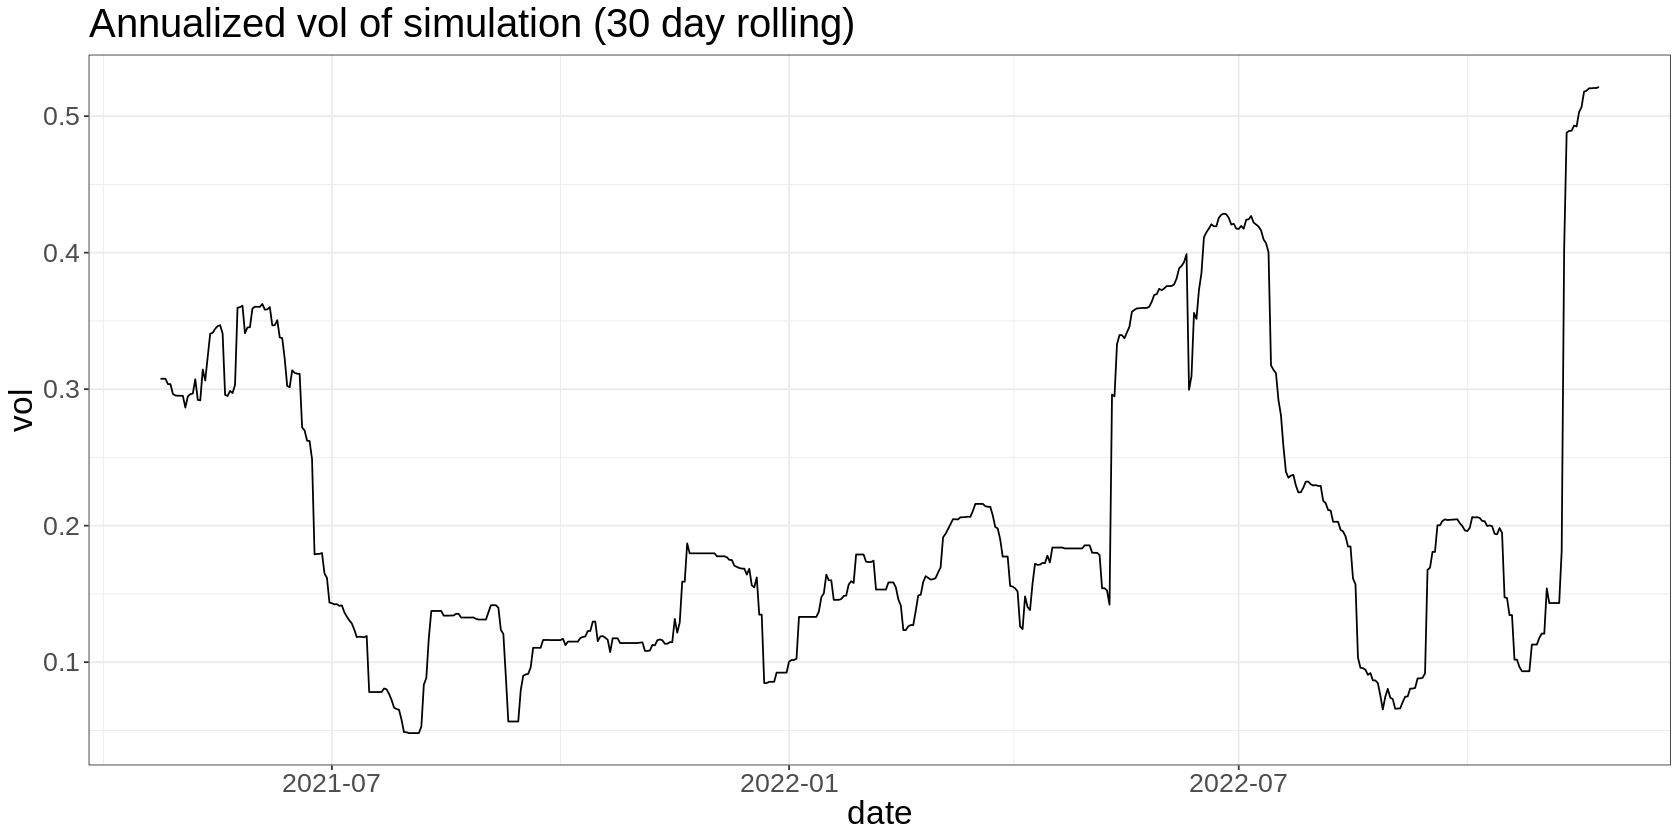

In [ ]:
returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.25,
    strat2df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.25
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )

returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.25x short 1M vol or 0.25x  position according to signal')

returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=30, .complete=TRUE) * sqrt(365)) %>%
  na.omit() %>% 
  ggplot(aes(x=date, y=vol)) + 
    geom_line() +
    ggtitle('Annualized vol of simulation (30 day rolling)')

Here's a half sized version:

- Assume $X assigned to strategy
- Long = Long 0.25 x M1
- Short = Short 0.25 x M1
- Flat = Cash
- Rebalance positions back to target if abs diff > 5% 

Strategy vol is down more than half.

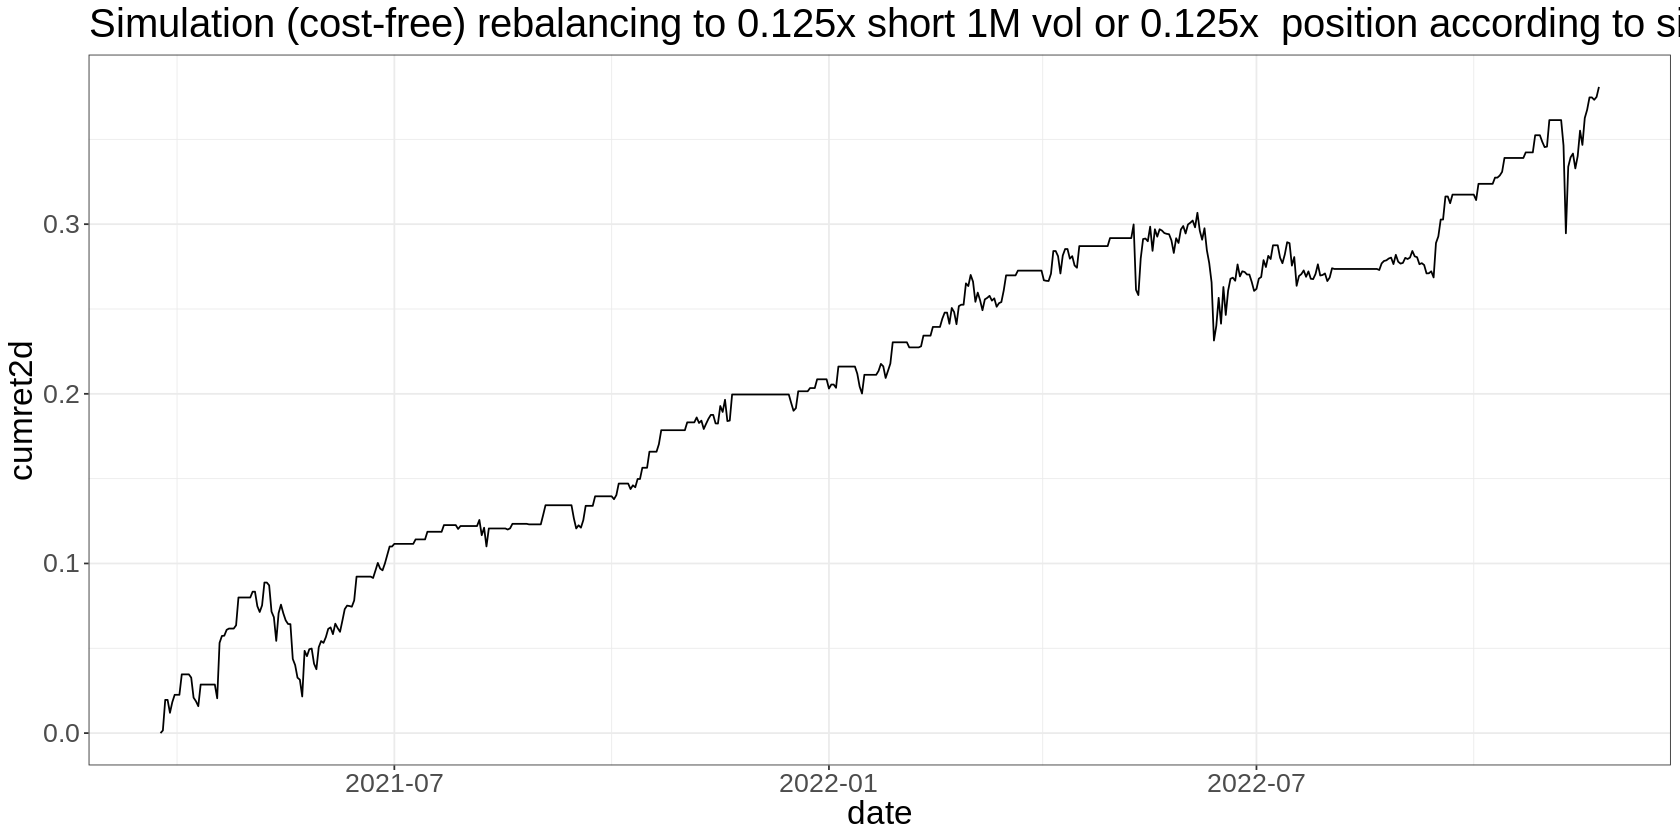

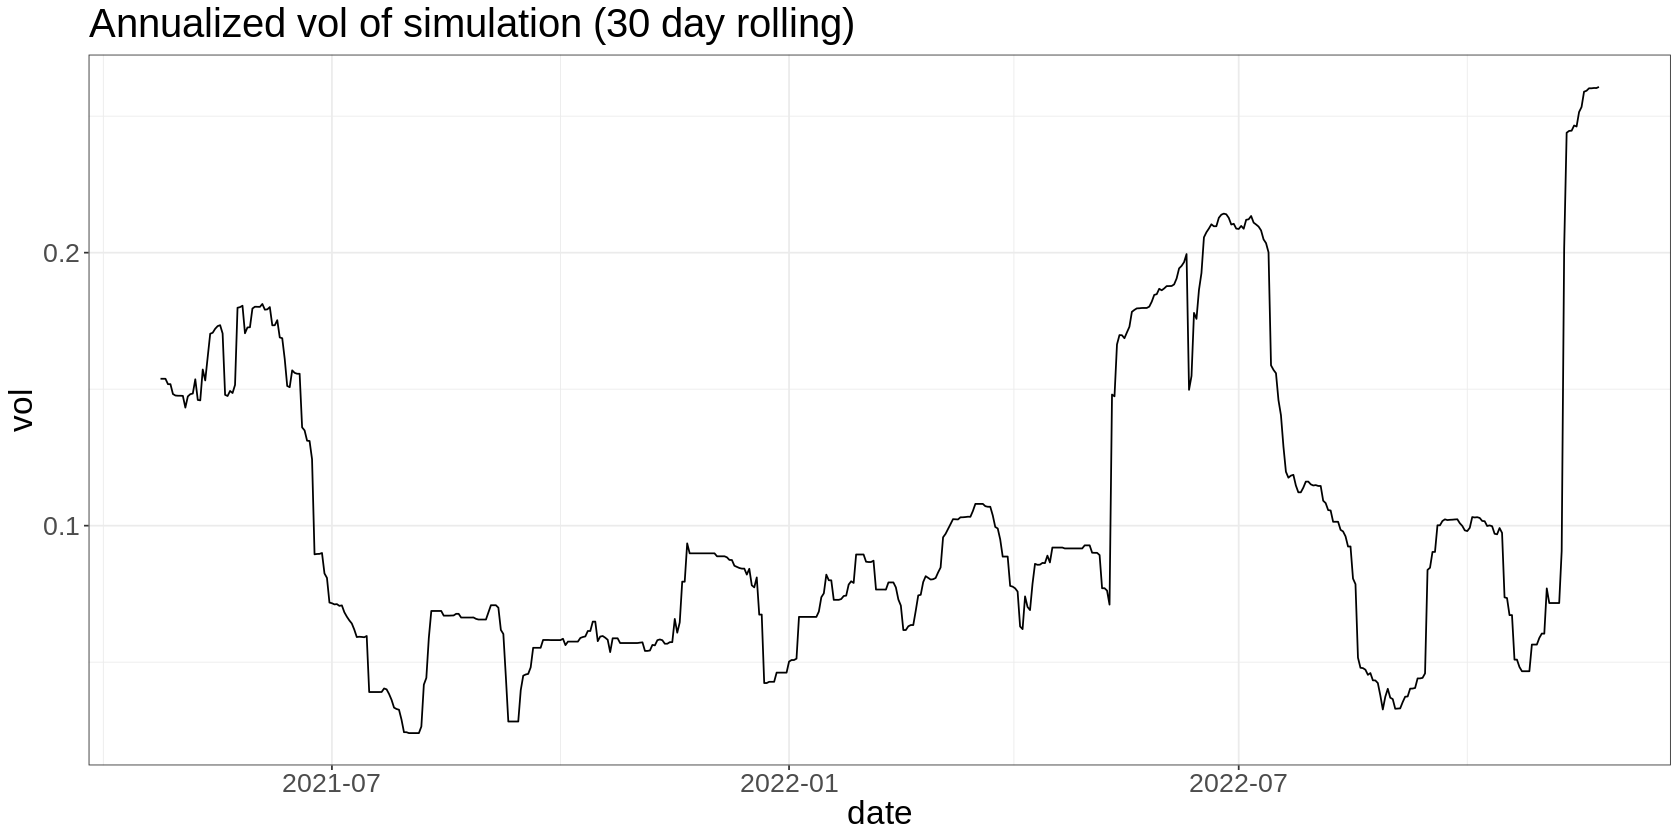

In [ ]:
returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )

returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.125x short 1M vol or 0.125x  position according to signal')

returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=30, .complete=TRUE) * sqrt(365)) %>%
  na.omit() %>% 
  ggplot(aes(x=date, y=vol)) + 
    geom_line() +
    ggtitle('Annualized vol of simulation (30 day rolling)')

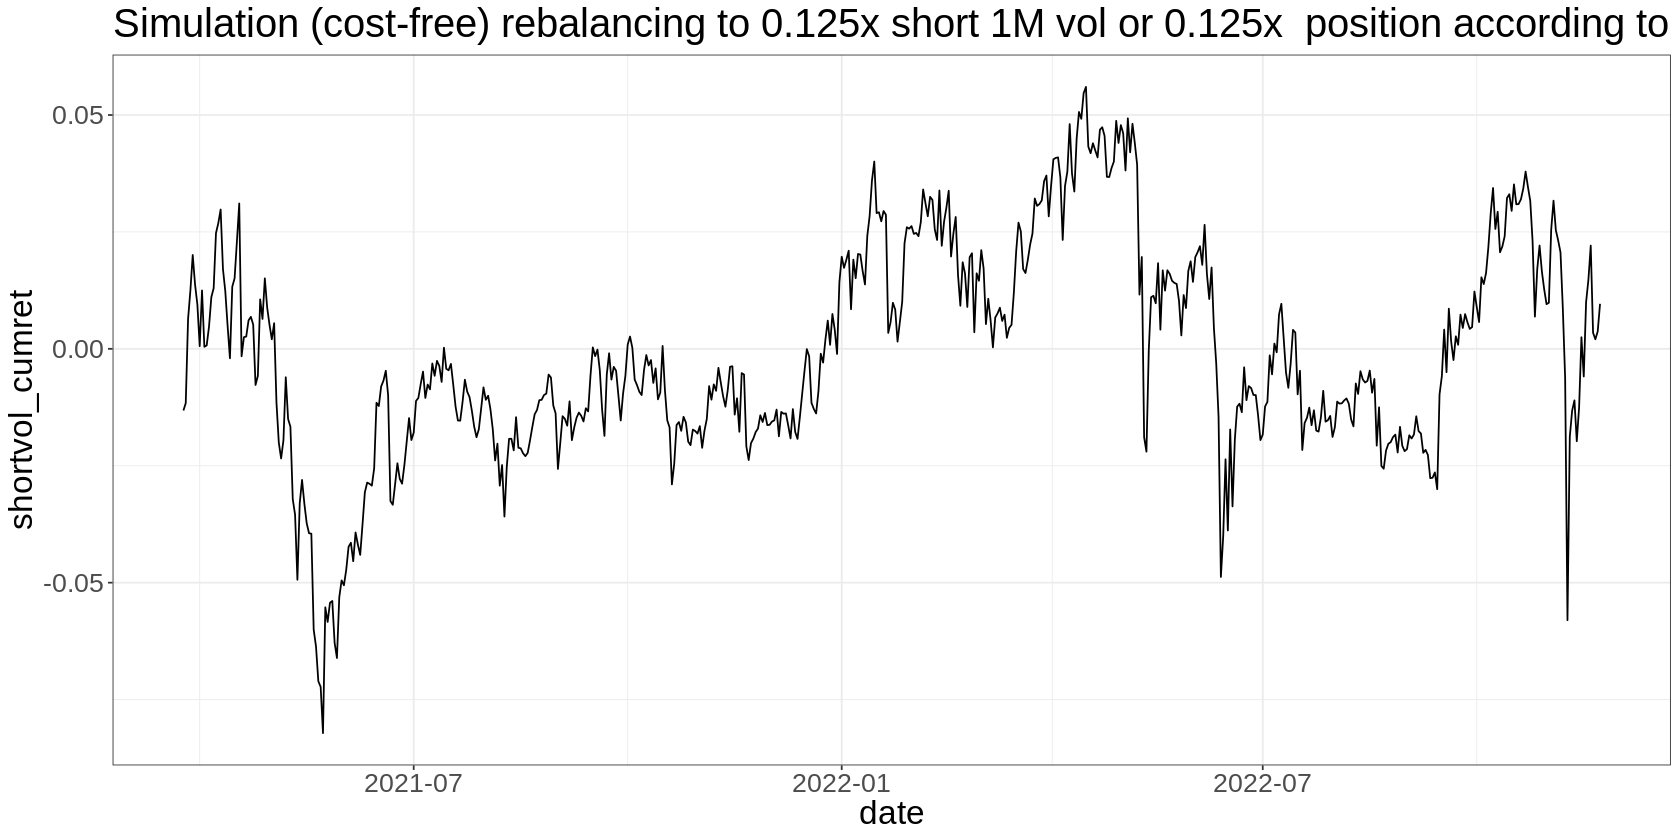

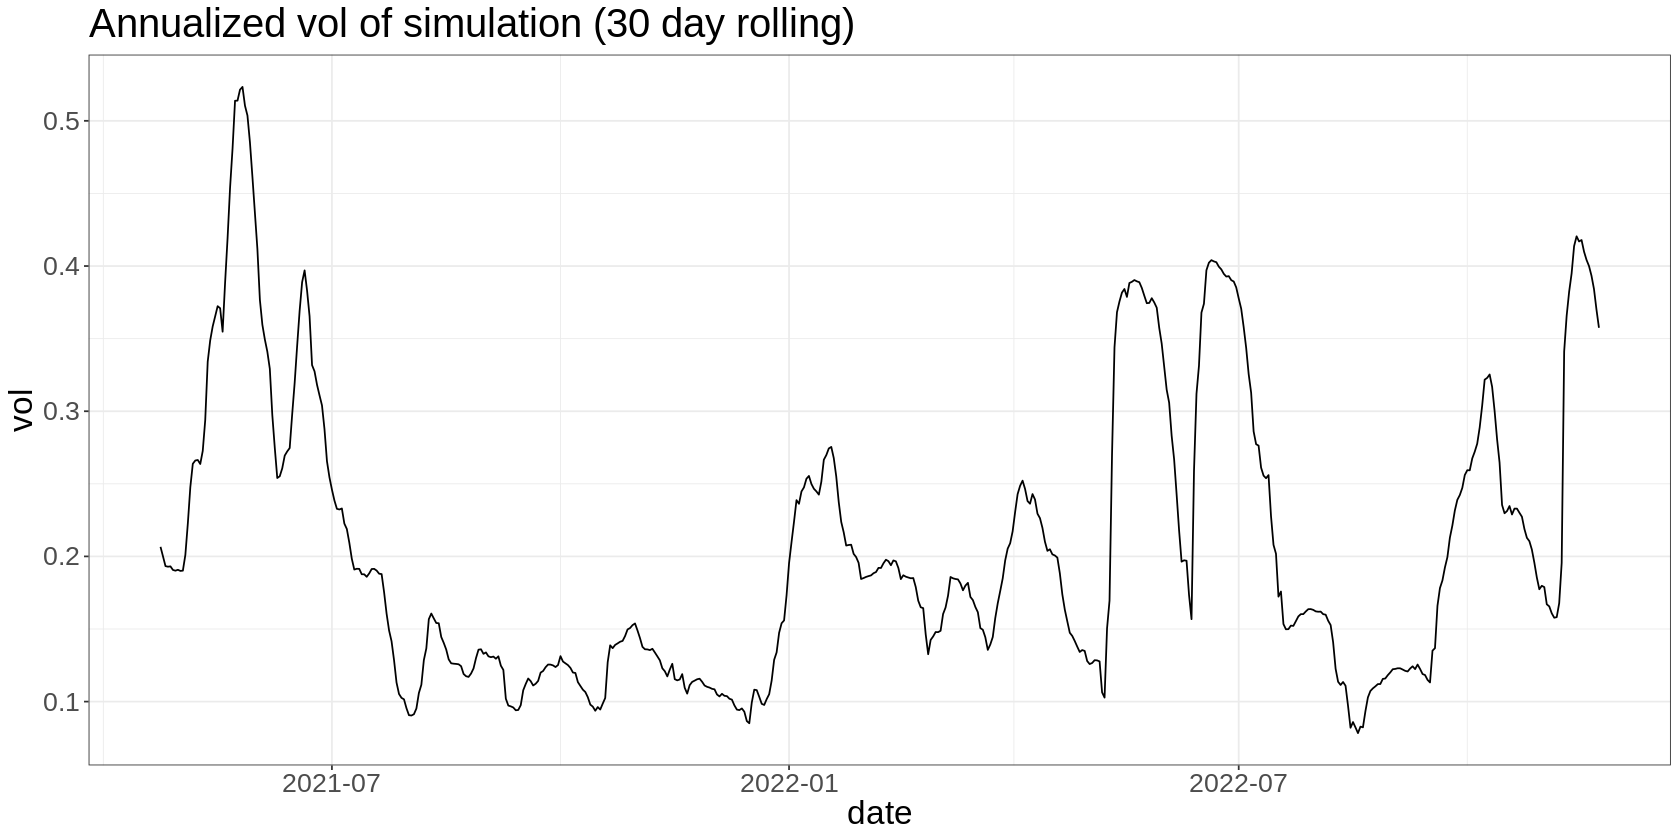

In [ ]:
sv_returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125
  ) %>%
  select(date, M1_1df, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    shortvol_ret = -M1_1df * 0.125,
    shortvol_cumret = cumsum(shortvol_ret)
  )

sv_returns %>%
  ggplot(aes(x=date, y=shortvol_cumret)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.125x short 1M vol or 0.125x  position according to signal')

sv_returns %>%
  mutate(vol = slider::slide_dbl(shortvol_cumret, sd, .before=30, .complete=TRUE) * sqrt(365)) %>% 
  na.omit() %>% 
  ggplot(aes(x=date, y=vol)) + 
    geom_line() +
    ggtitle('Annualized vol of simulation (30 day rolling)')

Let's plot long vol returns vs short vol returns. At least we get the same effect in equity options VRP harvesting of eating negative skew from time to time and long vol is rarely active but stair steps the equity curve.

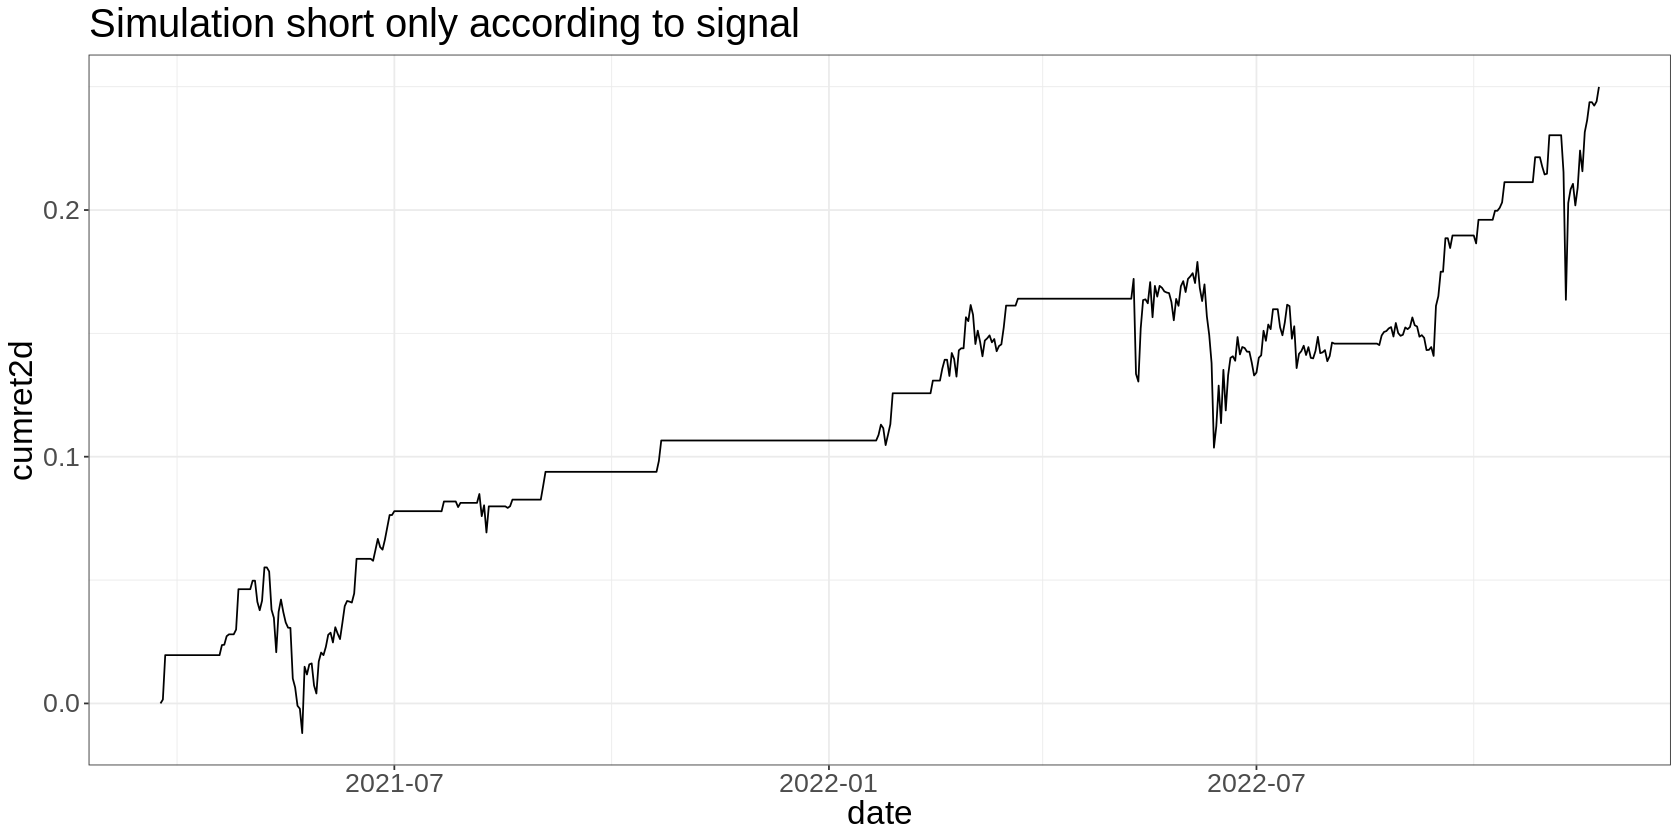

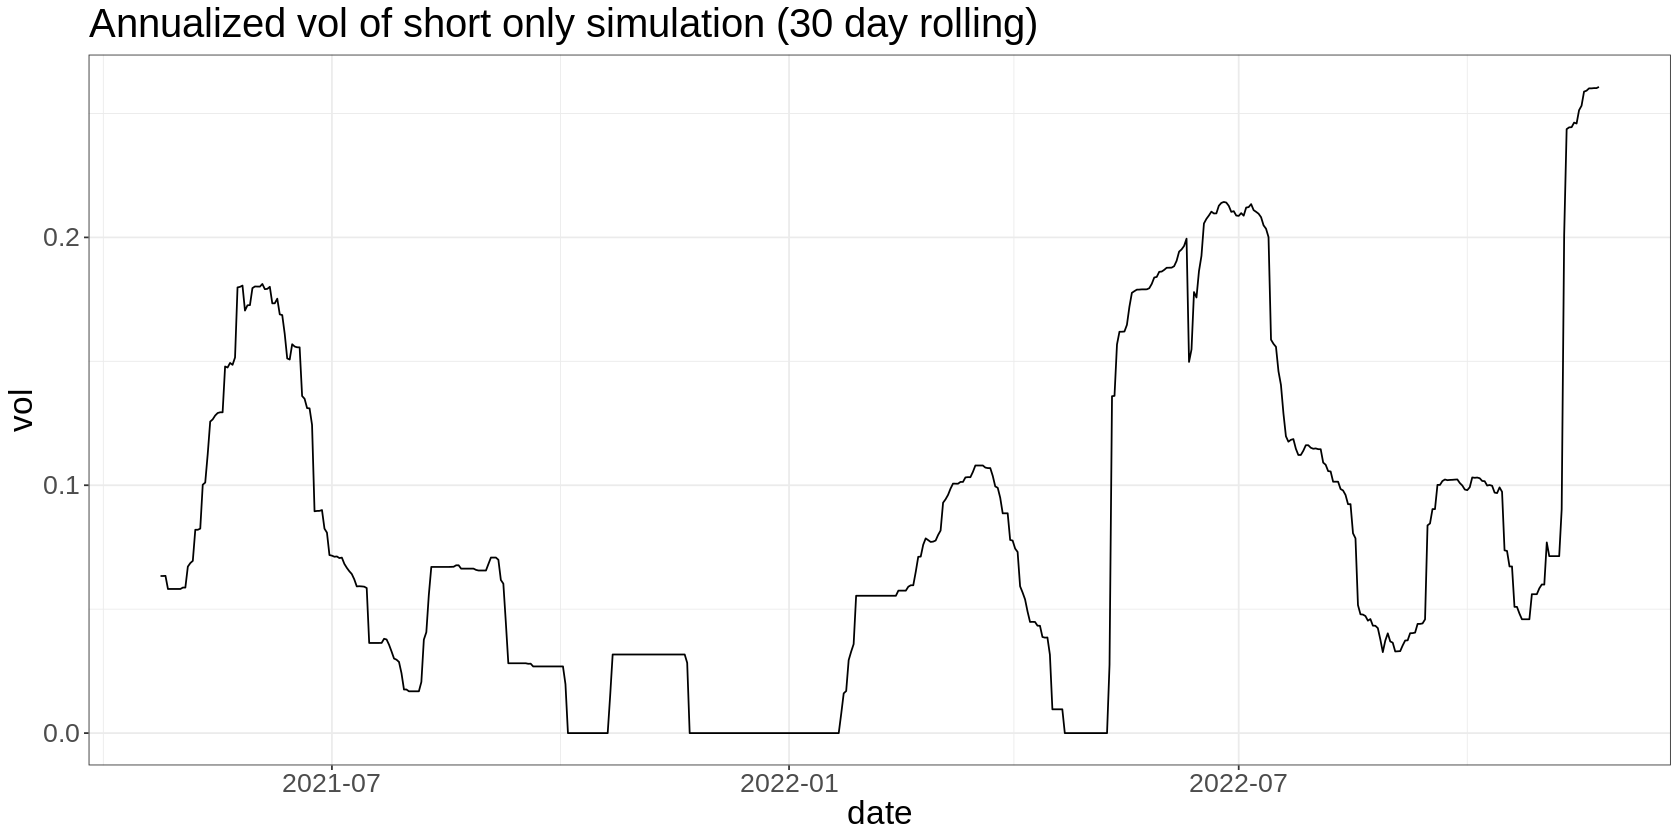

In [ ]:
s_returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ 0, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ -M1_1df, position == 'Long' ~ 0, TRUE ~ 0) * 0.125
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )

s_returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation short only according to signal')

s_returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=30, .complete=TRUE) * sqrt(365)) %>%
  na.omit() %>% 
  ggplot(aes(x=date, y=vol)) + 
    geom_line() +
    ggtitle('Annualized vol of short only simulation (30 day rolling)')

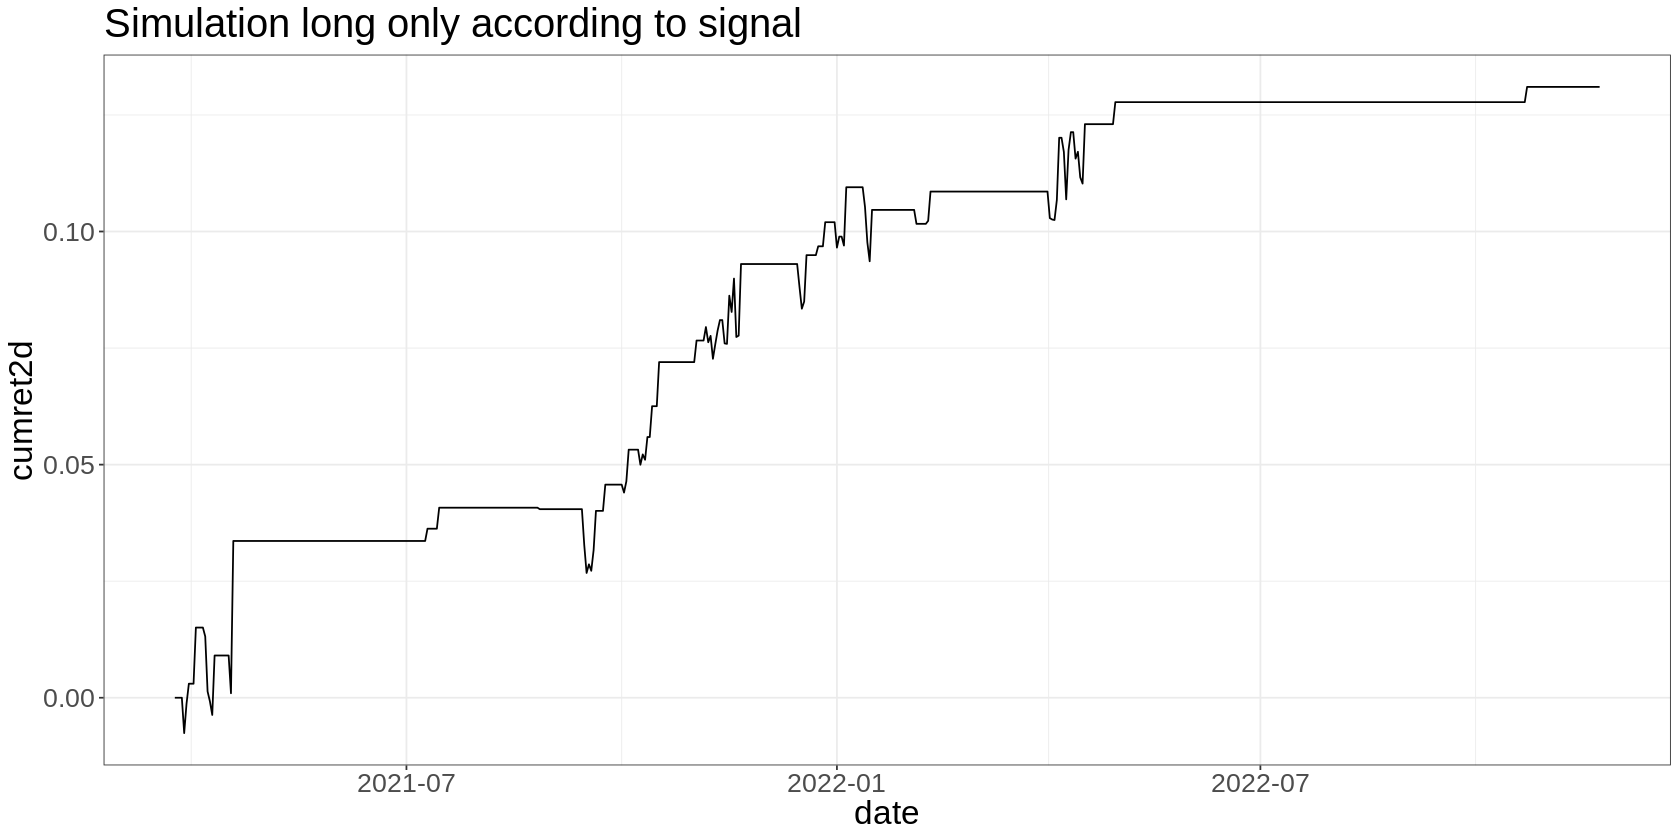

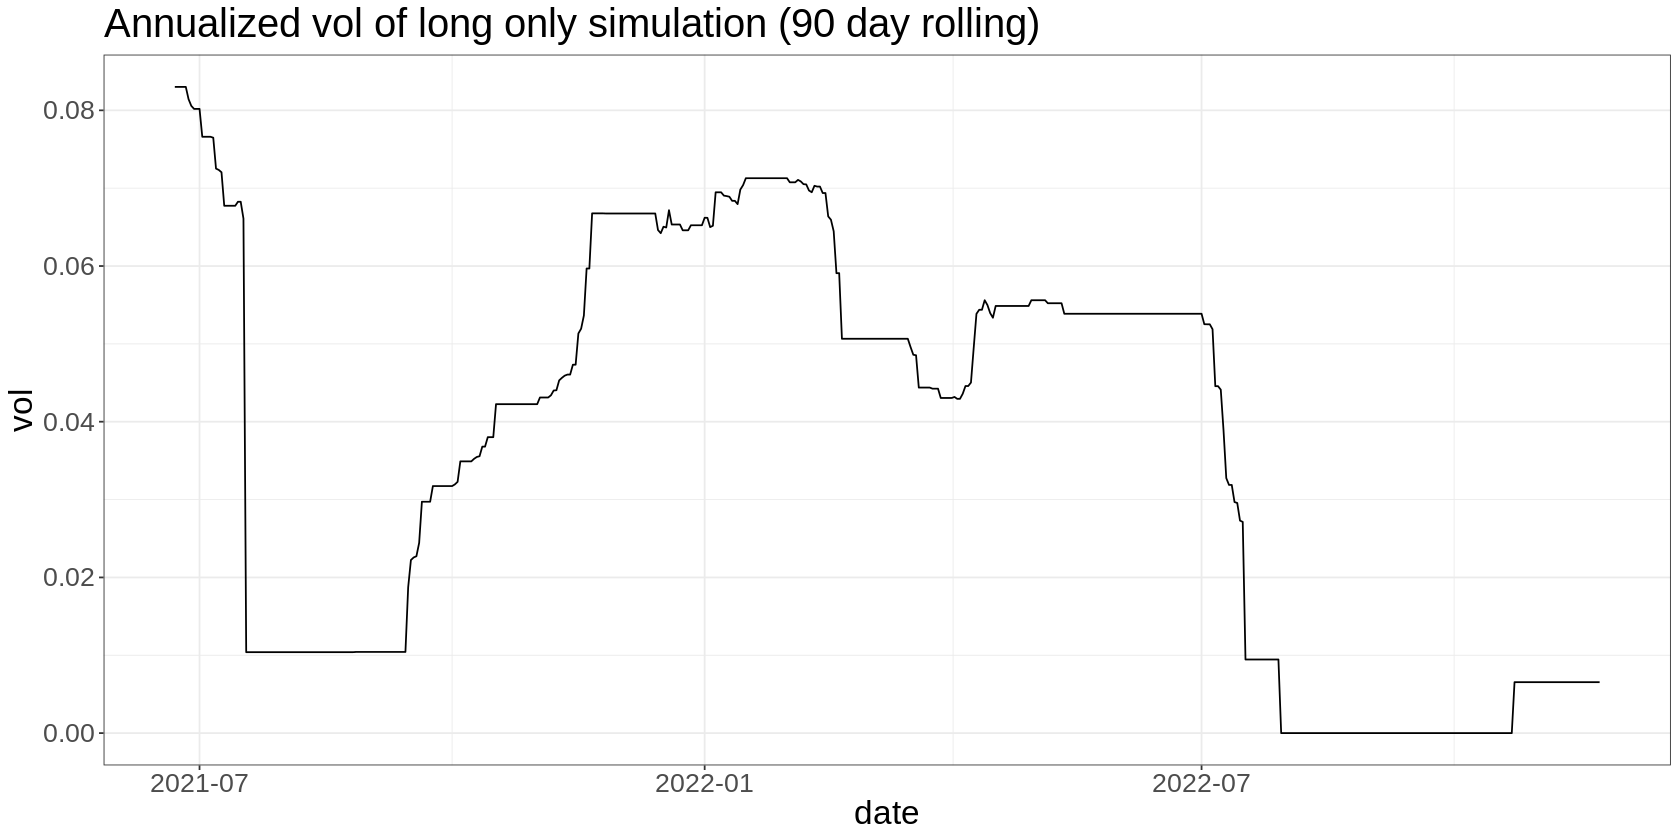

In [ ]:
l_returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ 0, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ 0, position == 'Long' ~ M1_1df, TRUE ~ 0) * 0.125
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )

l_returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation long only according to signal')

l_returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=90, .complete=TRUE) * sqrt(365)) %>%
  na.omit() %>% 
  ggplot(aes(x=date, y=vol)) + 
    geom_line() +
    ggtitle('Annualized vol of long only simulation (90 day rolling)')

## Summary & Next Steps:

Well, that's a grand tour of votality risk premia in crypto. There's seems to be something that brave souls can take a punt on. Risk-adjusted return we'll need to compare well with other opportunities. 20% strategy vol during the toughest month in 5 years isn't racy in crypto. Though cumulative log return isn't jaw dropping either.